

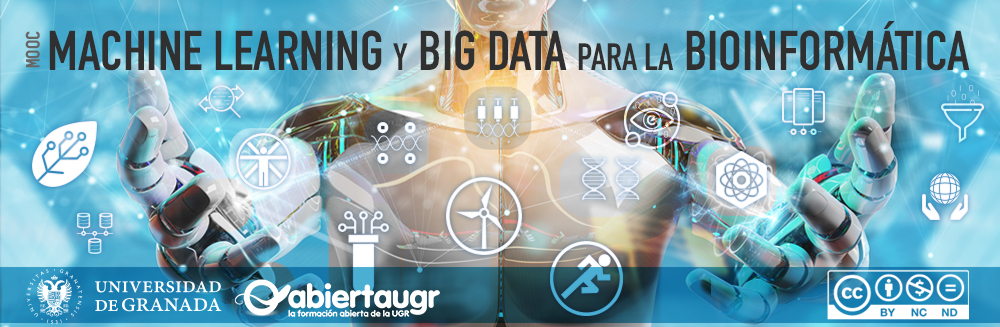



# **Machine Learning and Big Data for Bioinformatics.**
## **Module 2 - Bioinformatics Analysis of Omics data**

### Brief instructions



**An introduction to NoteBook**

This NoteBook will serve as a step-by-step guide from loading a dataset to the descriptive analysis of its contents. The Jupyter (Python and R) NoteBook
is an approach that combines text blocks (like this one) with code blocks or cells. These code cells can be interactively executed and check the results in
the notebook. It is fundamental that you follow the order of the instructions and so each cell in this NoteBook must be executed sequentially. If you omit
any of the steps, the program may throw an error, and so you should start again from the beginning in the case of any doubt. First: It is very important to
select “Open in draft mode” at the top left on the first page. Otherwise, for security reasons, the program will not allow any code blocks to be executed.
When the first of the blocks is executed, the following message will appear: “Warning: This NoteBook was not created by Google”. Don’t worry, you will
have to trust the contents of the NoteBook (NoteBook) to continue; click on “Run anyway”.

Click on the “Play” button on the left side of each code cell. Lines beginning with a hashtag (#) are comments and do not affect the execution of the
program. You can also click on each cell and press “Ctrl+enter” (Cmd+Enter on Mac) instead of clicking “Play”. Each time you execute a block, you will
see the output just below it. The information is almost always the last statement, along with any print() (print command) embedded in the code.

**Important note: this NoteBook contains some code cells that install libraries and functions that are needed to run the codes in Capsules 1, 2,
and 3. These installation cells will take several minutes to execute. In any case, you have
access to the results already executed for all the code cells and so we recommend that you continue reading the NoteBook while the
installation completes. This NoteBook is also available in PDF (both the code cells and the results cells) at abierta.ugr.es.**

**If your session times out, which happens if you close the browser or after a period of inactivity, you will have to reinstall the necessary
libraries, which will, again, take some time. Therefore, we recommend that you run the codes from the three capsules during the same session
and use the pre-calculated results displayed if you want to progress more quickly.**

# Capsule 1. The problem: how do we obtain and prepare data?


**Authors**:

*By* **Carlos Cano Gutiérrez**

Assistant Professor at the University of Granada, Department of Computer Science and Artificial Intelligence.

*By* **Pedro Carmona Sáez**   

Assistant Professor of the University of Granada, Department of Statistics and Operations Research.






## **INDEX**

In this *NoteBook*:
1. We establish the nomenclature with respect to the data sets that will be used during the rest of the course.
2. We describe a problem to be resolved by analyzing omics data that will be used to illustrate different methods during the rest of this course.
3. We will learn how to automatically download data from the TCGA (The Cancer Genome Atlas) project.
4. We will discover how TCGA data is organized.
5. We will gain knowledge about the application of some useful functions of the R programming language

Contents:
1. [Nomenclature of interest](#nomenclatura)
2. [Description of an omics problem.](#problema)
3. [Programming languages of choice: R and Python.](#set-up)
4. [Downloading TCGA data.](#download)
5. [TCGA data structure.](#data)






## **1. NOMENCLATURE OF INTEREST**

The protagonists of this course are the data and data analysis techniques. That’s why, before we start manipulating data, we need to agree upon the
nomenclature with which we will refer to certain terms and concepts frequently used in this field. When we think of large volumes of data, a table-like
representation with many rows and columns typically comes to mind. However, when data is generated, usually it is not clean and ready to use directly
into a single table. On the contrary, they are typically produced in different formats (text, images, audio, video, or as several tables with complementary
information, etc.), are heterogeneous, incomplete, and noisy.

The machine learning techniques we will teach you in this course do not learn directly from raw data (this term refers to unmanipulated or unprocessed
data in its original format and scale). For example, raw data includes images captured by computed tomography (CT) scanners or texts from patient
medical records. To analyze this type of data, we must first convert it to a format suitable for manipulation. As we will describe in the next capsule, the
process of converting, preparing, or manipulating data to allow its subsequent analysis via computational techniques is called preprocessing.

We define a data set as a collection of objects, points, records, patterns, events, cases, samples, observations, or instances. To unify the nomenclature
throughout this course, we will use the latter term, instances, to refer to each of these objects. For example, an instance could be a patient in a clinical
study. Instances can be represented as a set of characteristics, properties, or variables that describe them. Here we will use the latter term, variable, to
unify the nomenclature throughout the course. Thus, we define a variable as a single measure that characterizes a property of an instance.

Examples of variables are a person’s age, sex, or blood pressure at the time of sampling. Variables can be of different nature:

Qualitative.
*   Dichotomous, they have two possible values, for example: Sex (M/V), Smoker (Y/N)

*   Nominal: they can have several categories without order. For example different types of treatment
*   Ordinal: several categories between which there is an order, e.g. tumor stage or grade (T0, TI, TII, TIII, TIV), tumor stage TI is the initial stage,
and is preceding TII, which in turn precedes TIII, and so on.

Quantitative: numerical value, can be discrete or continuous.

---
**We will use the nomenclature defined in this section in the rest of the course. If the specific subject of a module invites us to use another
denomination for the data set (instances or variables), we will clearly specify this at the beginning of the module.**



## **2. DESCRIPTION OF AN OMICS PROBLEM** <a id='problema'></a>


This section describes one of the model problems that we will use during the course. It is the [TCGA-SKCM](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4580370/) (*TCGA-Skin Cell Melanoma*) project, an initiative by The Cancer Genome Atlas (TCGA) to undertake the multifactorial analysis of hundreds of skin melanoma samples. This type of analysis is called multifactorial because it includes several types of omics data introduced in Module 1. In this case, the omics data we will use are DNA, RNA, and protein level information about the tumor. The goal is to create a catalog of mutations associated with this tumor type and to identify patterns that have a clinical impact upon the prognosis of the disease.

This module problem is like hundreds of other problems used in the omics sciences today: starting from a certain scientific hypothesis, researchers collect hundreds of samples of the same condition. They then use sophisticated experimental techniques to characterize these samples in detail to discover
patterns in the data with potential clinical relevance.

In particular, the TCGA-SKCM project characterizes samples including genomic, transcriptomic, epigenetic, and clinicopathological information such as tumor stage, metastasis status, treatment type, and time to remission/death/relapse, etc.

Depending on the type of analysis performed upon the information obtained from the samples, the pattern identified might be used to predict a prognosis
more accurately or earlier. Among many other applications, it can also be leveraged to automatically classify the tumor typology or identify different tumor subtypes so that more specific treatments can be developed.

In this NoteBook we will illustrate the process of downloading and preparing data from the TCGA platform, using the TCGA-SKCM project as an example.


### **2.1. Gene expression data**

So-called gene expression data are extremely popular in transcriptomic analyses. This type of data is now obtained with RNA sequencing (RNA-Seq)
technologies. These technologies make it possible to identify RNA sequences in a cell sample and to quantify their relative abundances. That is, to
ascertain which genes were being expressed in the sample when it was processed for analysis and to assess their expression levels. In addition to
quantifying gene expression, the analysis of these data makes it possible to single out new sequences transcribed from DNA, identify alternative splicing
mechanisms, or detect allele-specific expression, among other possibilities.

More details about RNA sequencing can be found at the following links:

- http://cshprotocols.cshlp.org/content/early/2015/04/11/pdb.top084970.abstract
- https://www.nature.com/articles/nrg2484
- https://training.galaxyproject.org/training-material/topics/transcriptomics/

There are many steps involved in the analysis of RNA-Seq data. This process typically begins with read processing by aligning them against a reference
genome to quantify the number of RNA sequences associated with each position in the genome. Since the genomic position of a large repertoire of genes
is known, it is often stated that these techniques allow the degree of expression of each gene in a sample to be quantified. This information is available as a numerical matrix upon which we can perform statistical and computational analyses. In our case, and as an initial approach to the problem, we will start directly from the matrices quantifying the number of reads associated with each gene, focusing on their analysis.

## **3. PROGRAMMING LANGUAGES: R AND PYTHON**<a id='set-up'></a>


In this section we justify the selection of the two programming languages used in this course: R and Python. While Python will be the language utilized
because of its ease of use and the availability of numerous methods and resources for this language that are already programmed for machine learning,
we will also use R to perform some tasks related to data processing specific to bioinformatics. Both Python and R are free software and so any user can
access their code and make contributions to them in the form of libraries.

A library is a set of functions or programs that allow a task to be performed or a problem to be solved. Thus, here we will use one language or another
depending on the task to be undertaken and the resources each one provides to perform these tasks.

On the one hand, Python (www.python.org) is the most popular programming language for machine learning because it provides computational scientists
with numerous libraries already programmed to preprocess data, perform exploratory analyses and visualizations, and to infer and validate models. Some
of the libraries used in different modules in this course are Pandas, NumPy, Matplotlib, SciPy, and scikit-learn.

On the other hand, R (https://www.r-project.org) is the most popular programming language in bioinformatics because of the availability of many useful libraries to perform particular computational and statistical analyses on certain types of data specific to the field. For example, in this module we will use R functions available for download to visualize, process, and normalize data downloaded from the TCGA project.

Finally, Google Colab provides a ready-touse programming environment for both Python and R. However, first we will have to install some libraries with functions that will be useful to perform the different tasks we will undertake in the following sections.

### **3.1. Installing R and R libraries**



First, we must install R in our Google Colab environment. Note that Google Colab will always store your NoteBooks, and the information from NoteBooks
stored in files, in your Google Drive. However, all the library installations we perform in the Google Colab environment will only remain active for a few
hours, after which the installed libraries will delete themselves. Therefore, you will need to re-run the library installation codes in this section once a day, but only when you need to run NoteBooks containing R code.

On a personal computer running Linux OS, the usual way to download and install the required R libraries is through a Linux terminal (you do not need to
run this in Google Colab) by implementing the commands described below.

```
# 1 - Install the last R version

!apt-get update
!apt-get install r-base

# 2 - Open R terminal and install R libraries

install.packages("BiocManager")
install.packages(c("scales", "pheatmap", "DT", "factoextra", "BiocManager"))
BiocManager::install(c ("NOISeq", "ComplexHeatmap", "TCGAbiolinks", "limma"))
BiocManager::install(c("clusterProfiler", "org.Hs.eg.db", "DOSE", "enrichplot"))

```
This process takes a few minutes but you only have to perform it once.

However, since we are using Google-Colab computers, we propose another, faster, installation method: mount the required libraries in a folder in your
Google Drive. This process is described in the following steps, and you will need to follow each of these steps to be able to run the rest of the module
codes in Google Colab.


#### R and Bioconductor libraries installation instructions in Google Colab

To install the R and Bioconductor libraries in Google Colab, follow the steps below:

1. Run the following cell to install the python libraries we need.


In [ ]:
!apt-get install libcairo2-dev libjpeg-dev libgif-dev
!pip install pycairo


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgif-dev is already the newest version (5.1.9-2build2).
libgif-dev set to manually installed.
libjpeg-dev is already the newest version (8c-2ubuntu10).
libjpeg-dev set to manually installed.
The following additional packages will be installed:
  libblkid-dev libblkid1 libcairo-script-interpreter2 libffi-dev libglib2.0-dev libglib2.0-dev-bin
  libice-dev liblzo2-2 libmount-dev libmount1 libpixman-1-dev libselinux1-dev libsepol-dev
  libsm-dev libxcb-render0-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev libglib2.0-doc libgdk-pixbuf2.0-bin | libgdk-pixbuf2.0-dev
  libxml2-utils libice-doc cryptsetup-bin libsm-doc
The following NEW packages will be installed:
  libblkid-dev libcairo-script-interpreter2 libcairo2-dev libffi-dev libglib2.0-dev
  libglib2.0-dev-bin libice-dev liblzo2-2 libmount-dev libpixman-1-dev libselinux1-dev libsepol-dev
  libsm-dev libxcb-r

2. The following link contains a Google Drive folder containing all the libraries you need to run the NoteBooks from Capsules 1, 2, and 3. Click on the
following link to open the libraries folder in your Drive (“Shared with me”):
https://drive.google.com/drive/folders/1nglwQf-03PcNy-mGnaa4gGPPdHdXs_tw?usp=drive_link

3. Right-click on the “r-lib” folder and choose the “Add shortcut to drive” option to add the “r-lib” folder to “Your Drive” in Google Drive


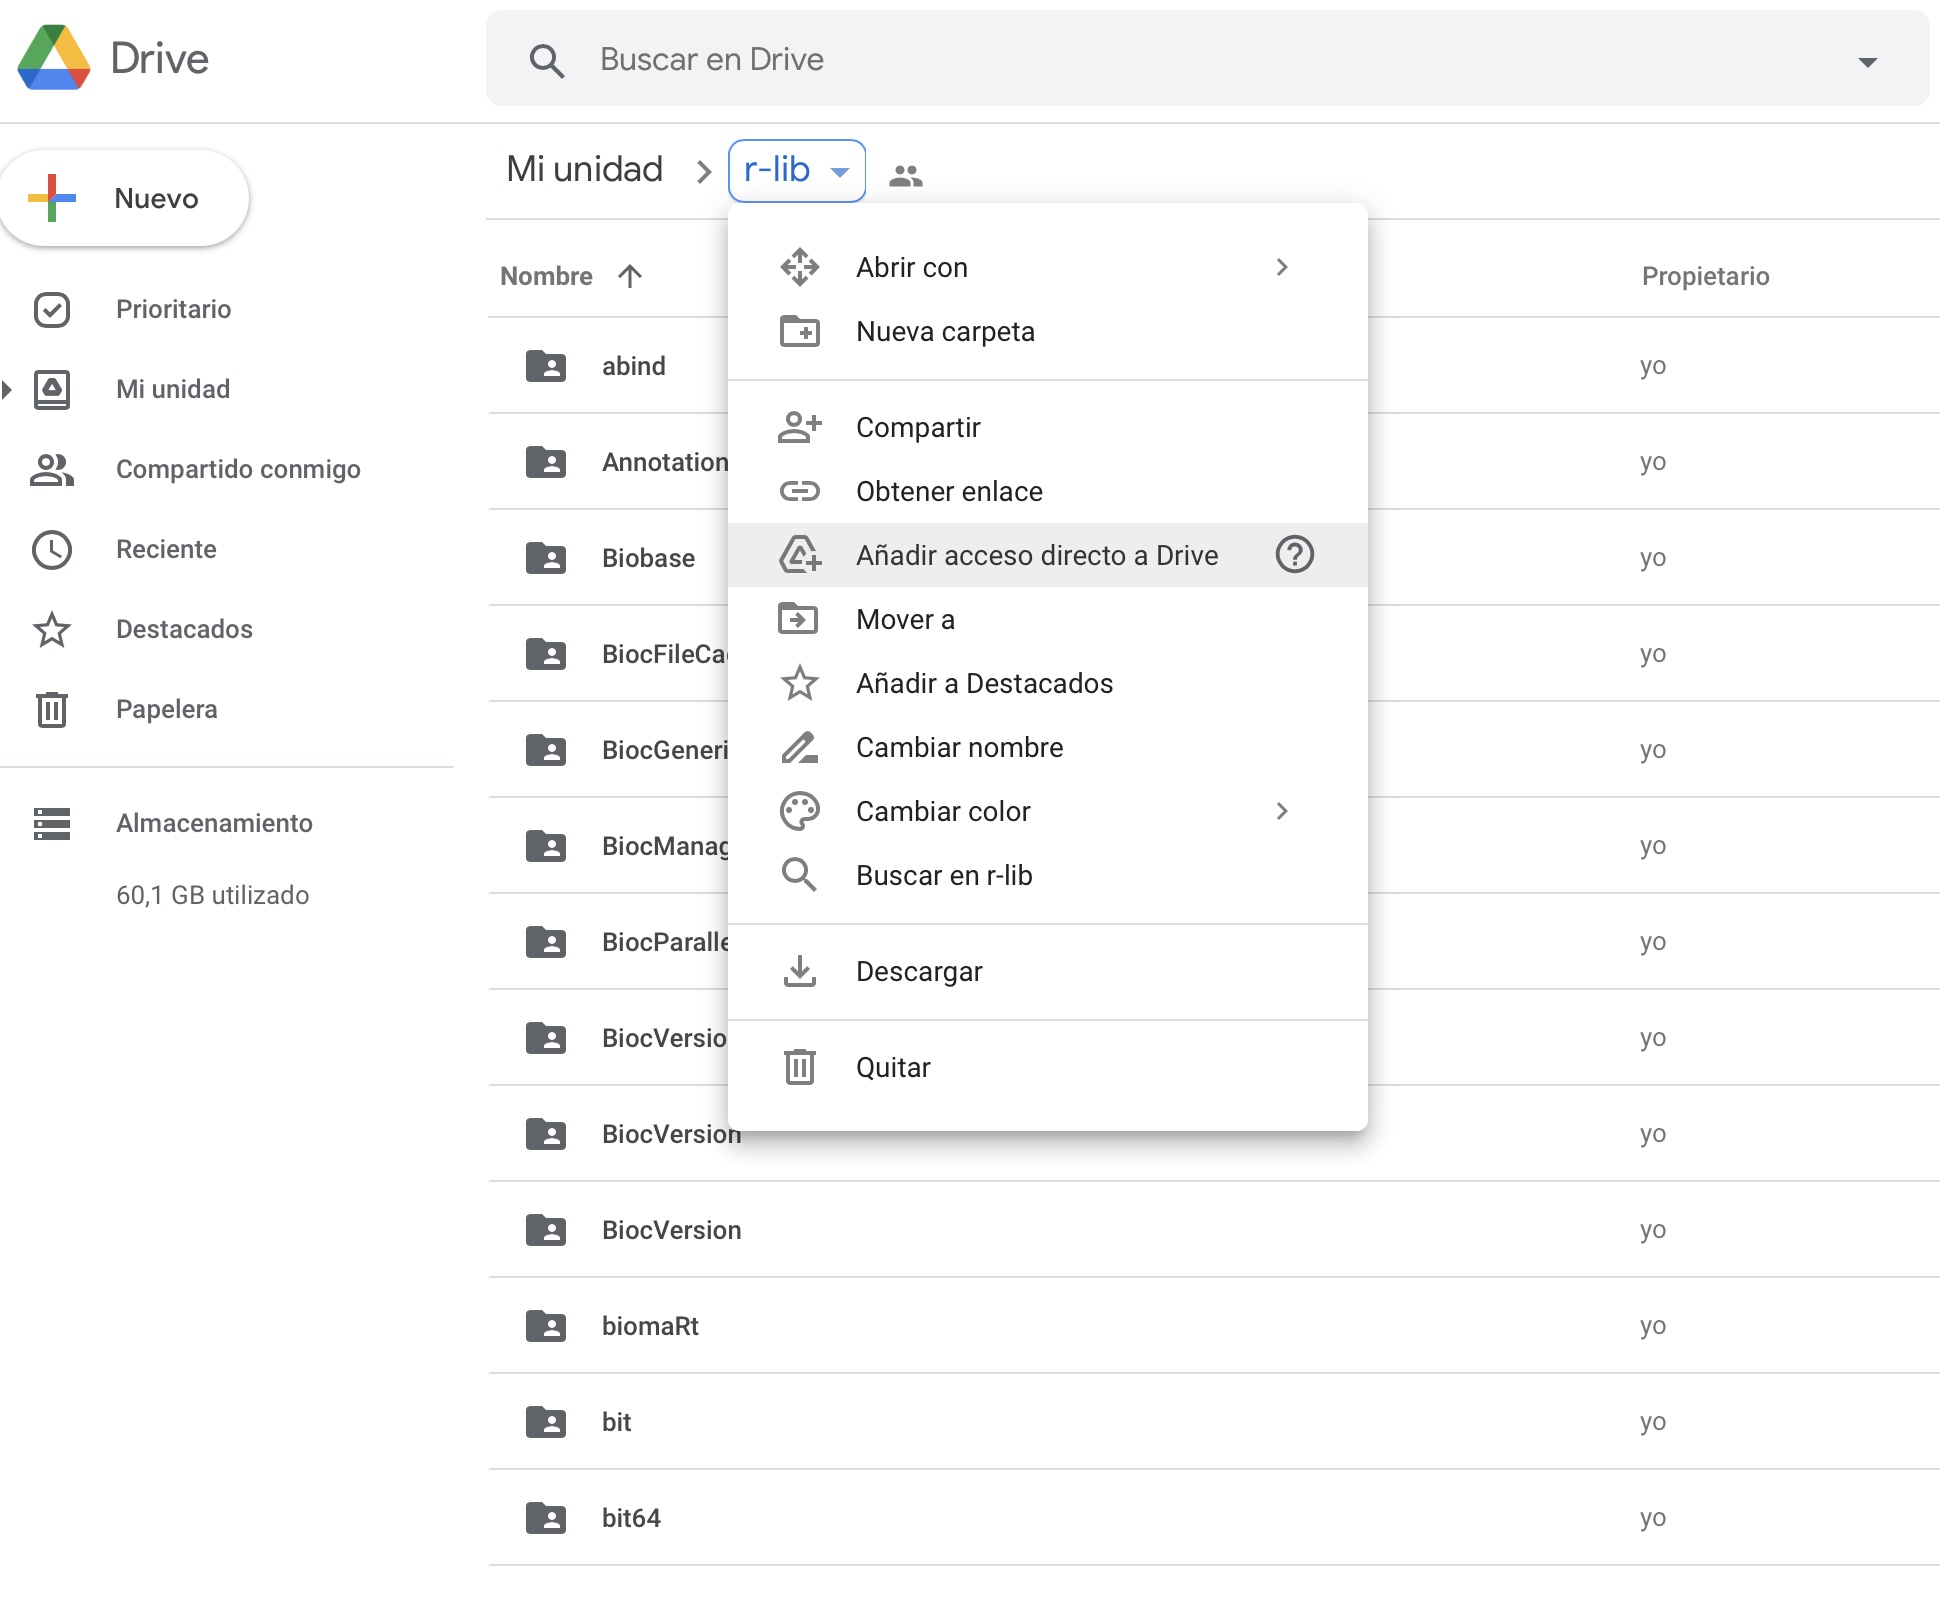

You will then need to indicate where in your Drive you want to store the shared folder. Choose the “My drive” folder and click the “Add shortcut” button.

*Note: If you prefer, you can choose any folder within “My drive”, but you will have to remember the path to that folder and modify the following examples
accordingly. Thus, for ease of work, we recommend that you simply select “My Drive”/”My Drive” and add the shortcut.*

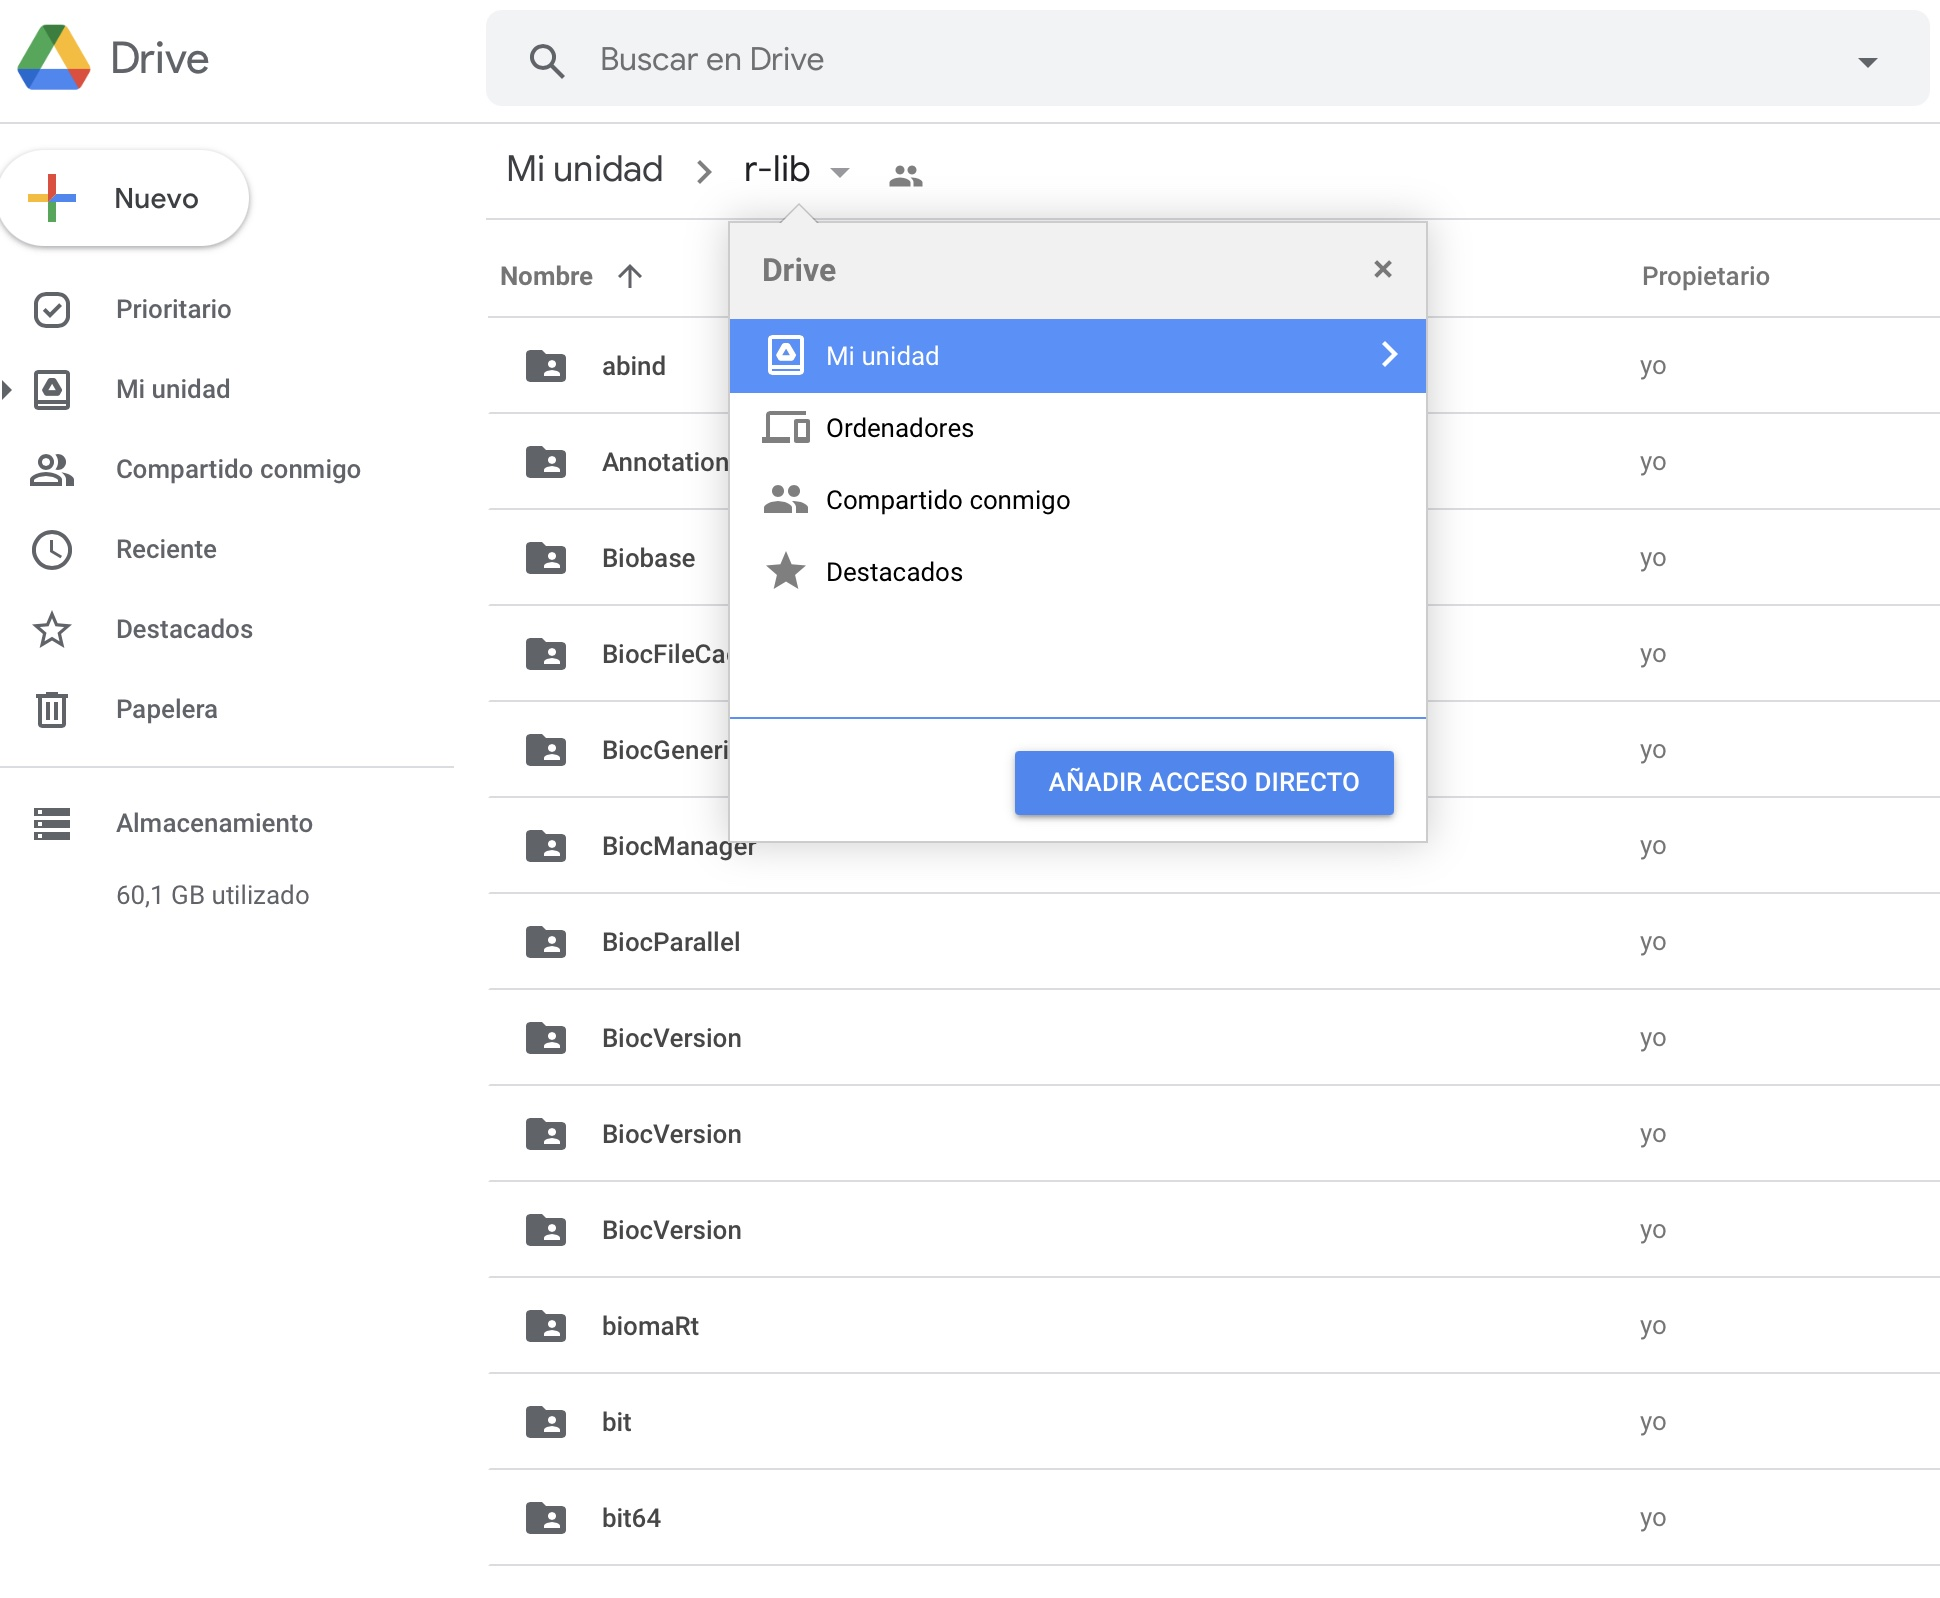

4. Execute the code cell below to connect your Drive to Google Colab. Google Colab will ask you to log into Google Drive with your username and
password and authorize Google Colab to access your Drive. Google Colab and Google Drive are two Google tools and through this process you are
allowing them to communicate with each other; this it does not pose a risk to the security of your Google Drive documents.





In [ ]:
from google.colab import drive
drive.mount('/content/mydrive', force_remount=True)


Mounted at /content/mydrive


If you get the message Mounted at/content/mydrive , the process has finished successfully.

5. You now have access to the R libraries we need for this module. To import the libraries from the “r-lib” folder into your Google Drive, run the following
code cells:


In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
#add MyDrive/r-lib folder to the path
.libPaths( c( "/content/mydrive/MyDrive/r-lib-220424" , .libPaths() ) )
.libPaths()


[1] "/content/mydrive/MyDrive/r-lib" "/usr/local/lib/R/site-library" 
[3] "/usr/lib/R/site-library"        "/usr/lib/R/library"            


6. You should now check the correct loading of some of the libraries you will need while completing this NoteBook.

In [ ]:
%%R

library(TCGAbiolinks)
library(SummarizedExperiment)

print(sessionInfo())



Attaching package: ‘MatrixGenerics’



    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges, rowRanks,
    rowSdDiffs, rowSds, rowSums2, rowTabulates, rowVarDiffs, rowVars,
    rowWeightedMads, rowWeightedMeans, rowWeightedMedians,
    rowWeightedSds, rowWeightedVars





Attachi

R version 4.3.3 (2024-02-29)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 22.04.3 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/liblapack.so.3;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats4    tools     stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] SummarizedExperiment_1.32.0 Biobase_2.62.0             
 [3] GenomicRanges_1.54.1        GenomeInfoDb_1.38.8        
 [5] IRanges_2.36.0              

If you get an error like `Error in library (...): there is no package called '...'`, the libraries have not been installed properly. In this case, run steps 1 to 6 again to check that all of them have been executed correctly. Otherwise, you will get a list of the installed R libraries and their version number, similar to the following:
```
R version 4.3.3 (2024-02-29)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 22.04.3 LTS

[Installed R libraries and version are listed]
```

With this, the installation process will have finished successfully and you can continue to the next section.


**If you have an error:**

`Error: package ‘...’ could not be loaded`

or

`Error in library (...): there is no package called '...'`

**your session has expired and you have to do again steps 1-6 to reload the libraries.**



## **4. DOWNLOADING TCGA DATA** <a id='download'></a>

Before we start, we must load the R libraries we need for this part of the *NoteBook*.

In [ ]:
%%R
# Load libraries


library(TCGAbiolinks)
library(SummarizedExperiment)
library(pheatmap)
library(limma)



Attaching package: ‘limma’



    plotMA




The TCGA project allows any user to access and download its data for free. The following code illustrates, as an example, how to download the TCGA
skin melanoma project data (Project code: TCGA-SKCM). In particular, we are interested in downloading the gene expression data (Category: Gene
expression, Type: Gene expression quantification) which is already normalized by the method Expectation-Maximization [RSEM](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-12-323) (`file.type="normalized_results"`).
```
%%R
# Download TCGA-SKCM expression data.

query <- GDCquery(project = "TCGA-SKCM",
                  data.category = "Gene expression",
                  data.type = "Gene expression quantification",
                  legacy=TRUE,
                  file.type= "normalized_results")

GDCdownload(query)

normRSEMtranscr.counts <- GDCprepare(query)

```


We will explain in more detail in the next capsule how to download TCGA data and what the role of normalization is. For now, and to speed up the execution of this notebook, it is sufficient to download a preprocessed expression matrix we made available using the code in the next cell.


In [ ]:
%%R
# Load a normalized expression matrix from this file
normRSEMtranscr.counts <- readRDS("/content/mydrive/MyDrive/r-lib-220424/normRSEMtranscr.counts.RDS")


In addition to data generated by various experimental techniques in the omics sciences, TCGA also makes the clinical data from its study samples
available to the scientific community. Many types of clinical data are associated with the samples, for instance, treatment (drugs used and their doses), tumor stage, recurrences, type of radiation used, and patient clinical information.

The following code illustrates how patient (`patient`), treatment (`drug`), and recurrence (`new_tumor_event`) clinical data can be retrieved for ten TCGA-SKCM study samples.

In [ ]:
%%R

## Download clinical data
subsetSamples=c("TCGA-EB-A5SF","TCGA-EE-A3J8","TCGA-EB-A430","TCGA-BF-AAP1","TCGA-EE-A3J3","TCGA-EB-A550","TCGA-FR-A3YO","TCGA-YD-A9TA","TCGA-EB-A5FP","TCGA-EB-A3XB")
query<-GDCquery(project = "TCGA-SKCM",
                data.category = "Clinical",
                data.type = "Clinical Supplement",
                data.format = "BCR XML",
                barcode = subsetSamples)

GDCdownload(query)

clinical.patient<-GDCprepare_clinic(query, clinical.info = "patient")     #basic info
clinical.drug <- GDCprepare_clinic(query, clinical.info = "drug")         #treatment info
clinical.new_tumor_event<-GDCprepare_clinic(query, clinical.info = "new_tumor_event") #new tumor event


  |======================================================================| 100%



=> drugs: drug 
=> follow_ups: follow_up 
=> radiations: radiation




  |======================================================================| 100%


  |======================================================================| 100%


  |======================================================================| 100%
  |===============================================================       |  90%
  |======================================================================| 100%


The clinical information for these samples, together with other information derived from different omics studies on these same samples, is also available in
a data [table in Excel format] (https://drive.google.com/uc?id=1Wjyktizno4tUt8bjnBxpX-XUZDAWXWa4).

The gene expression data and clinical information data table will be used in different modules of this course:.

## **5. TCGA DATA STRUCTURE** <a id='data![texto alternativo](https://)'></a>


After downloading the data, in this section we propose an initial approach to its inspection in order to understand its structure and nature. We will address
how to conduct a complete exploratory analysis in the next capsule.

### **5.1. Expression data**



Note that the downloaded data was stored in the variable `normRSEMtranscr.counts`. Let’s now take a closer look at its structure

In [ ]:
%%R
normRSEMtranscr.counts

class: RangedSummarizedExperiment 
dim: 19947 473 
metadata(1): data_release
assays(1): normalized_count
rownames(19947): A1BG A2M ... TICAM2 SLC25A5-AS1
rowData names(3): gene_id entrezgene ensembl_gene_id
colnames(473): TCGA-D9-A4Z6-06A-12R-A266-07
  TCGA-EE-A2MQ-06A-11R-A18S-07 ... TCGA-DA-A1I2-06A-21R-A18U-07
  TCGA-D3-A2JK-06A-11R-A18S-07
colData names(179): sample patient ... subtype_DIPYRIM.C.T.n.C.T..mut
  subtype_SHATTERSEEK_Chromothripsis_calls


Briefly, for the gene expression data obtained by massive sequencing, we quantify the expression of a gene by the number of reads that map to the
corresponding genomic coordinates. We obtain a matrix from the quantification and normalization of the number of reads, where each row represents a
gene and each column a sample. The structure indicates that, in this case, the expression matrix contains expression values of `19,947` genes for `473`
different samples. At a glance, we can see the list of gene names (A1BG A2M, etc.) and the list of sample names (`TCGA-D9-A4Z6-06A-12R-A266-07
  TCGA-EE-A2MQ-06A-11R-A18S-07`, etc.).

These lists are truncated so that all the main information can be displayed in only a few lines on the screen.
To facilitate the subsequent analysis process, we will decompose this structure into three parts: (1) the gene expression matrix (stored in the data
variable); (2) the information about the genes (“genes.info” variable); and (3) the information about the samples (“sample.info” variable)

In [ ]:
%%R
data<-assay(normRSEMtranscr.counts)
genes.info<-rowRanges(normRSEMtranscr.counts)
sample.info<-colData(normRSEMtranscr.counts)


We can also store the most relevant data we need to keep in text files for later retrieval in *NoteBooks*.

In [ ]:
%%R
write.table(data, file= "exprMatrix_prep_RSEM.tsv", sep="\t")

Remember that all code cells starting with `%%R` contain R language code and the rest of the cells contain Python code. After downloading the data using
R functions and libraries, the data of interest will have been stored as a series of R variables (`data`, `genes.info`, `sample.info`, etc.). If we would now like to analyze that information using Python libraries, we can store the R variables as Python variables, as illustrated in the following code cell:

In [ ]:
# nombre_variable_en_python = %R nombre_variable_en_R
data = %R data
genes = %R genes.info
samples = %R sample.info
clinica = %R clinical.patient
tratamientos = %R clinical.drug
recurrencia = %R clinical.new_tumor_event

The following code cell shows the appearance of an expression matrix. Note that the matrix layout shows one gene per row (19,947 in total) and one
sample (473 in total) per column.

In [ ]:
# Python code
#  python "data" variable contains expression matrix
import pandas as pd
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,...,463,464,465,466,467,468,469,470,471,472
0,289.5954,83.6439,184.0986,244.8919,331.2836,56.9041,336.4169,183.3201,108.2598,603.0462,...,978.8831,184.5297,208.1906,242.0064,348.6913,118.1955,167.6706,233.0849,158.2468,581.3953
1,9084.8501,20085.5930,138756.1441,16349.6542,47838.7504,22344.0675,17552.2154,3223.5639,35010.4314,20336.0767,...,35530.4393,20639.7659,6132.1631,22249.7260,28913.7974,87810.7281,551899.9956,18354.0208,11907.1669,11302.3256
2,94.9051,57.0643,45.4545,84.4794,45.9054,92.2190,56.5111,83.6367,93.4803,111.3445,...,8.1906,23.8405,52.8667,116.1142,70.4180,72.4179,42.2858,39.8614,167.8354,42.6357
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.4117,0.0000,0.0000,0.4794,0.0000,...,0.0000,0.0000,0.3723,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,66.4336,2770.7116,59.7072,160.3143,2724.2845,112.3919,90.4996,20.6552,30953.4995,2237.3950,...,6.7014,3065.4530,59.9404,5151.8026,3061.4148,2357.7364,32557.6994,17494.5118,6598.1767,213.1783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19942,29.6054,45.4624,28.6402,19.0177,16.7186,13.9975,161.1548,19.4024,26.5149,41.7647,...,30.5287,53.8405,48.0640,26.4840,11.2540,19.6597,45.5386,14.4425,13.5928,42.6357
19943,1.9980,1.7188,3.0817,0.7859,7.9343,9.0572,0.8190,0.6772,3.8351,1.5756,...,1.4892,0.4335,3.3507,5.0001,20.2572,8.7060,2.3656,4.0439,2.8050,0.0000
19944,12.4875,13.0629,3.8521,19.6464,10.2012,50.2264,13.1040,12.5286,10.5465,9.4538,...,8.9352,28.1751,7.0737,10.0003,10.9325,9.1017,7.9840,40.4391,33.6606,0.0000
19945,0.0000,134.4311,180.0693,126.9548,387.7274,111.7867,74.0090,37.9650,515.3068,62.9464,...,71.5860,39.3368,41.5153,18.9227,29.8682,119.2837,153.8523,248.1456,152.7723,39.3798


In the next capsule we will start an exploratory analysis of these data and address two essential steps that must be carried out before any computational
analysis: data preprocessing and normalization.


### **5.2. Clinical data and the results of omics studies**




In addition to gene expression data, clinical data from the samples and other results derived from different omics studies were also available and may be
of interest to identify novel patterns or relationships present in the data.

The following code illustrates how to download a table containing such data in Excel format from a URL, save the table in a variable (“base_data”), and
visualize its contents for its preliminary exploration.

In [ ]:
# Import pandas library
import pandas as pd

# Store data link in 'url_datos'
url_datos = 'https://drive.google.com/uc?id=1Wjyktizno4tUt8bjnBxpX-XUZDAWXWa4'

# read_excel allows us to read excel file
base_datos = pd.read_excel(url_datos, sheet_name='Supplemental Table S1D', header=1, na_values='-')

# Show the complete table
base_datos


,Name,MUTATIONSUBTYPES,ALL_PRIMARY_VS_METASTATIC,REGIONAL_VS_PRIMARY,UV-signature,RNASEQ-CLUSTER_CONSENHIER,MethTypes.201408,MIRCluster,ProteinCluster,OncoSignCluster,...,CURATED_DISTANT_ANATOMIC_SITE,CURATED_VITAL_STATUS,CURATED_DAYS_TO_DEATH_OR_LAST_FU,CURATED_TCGA_DAYS_TO_DEATH_OR_LAST_FU,"CURATED_MELANOMA_SPECIFIC_VITAL_STATUS [0 = ""ALIVE OR CENSORED""; 1 = ""DEAD OF MELANOMA""]",CURATED_TCGA_SPECIMEN_Distant,CC>TT/nTotal.Mut,DIPYRIM.C>T/nTotal.Mut,DIPYRIM.C>T/n(C>T).mut,SHATTERSEEK_Chromothripsis_calls
0,TCGA-BF-A1PU-01,BRAF_Hotspot_Mutants,All_Primaries,NaN,UV signature,keratin,normal-like,MIR.type.3,PROT.type.1,OSC.6,...,NaN,NaN,NaN,NaN,NaN,NaN,0.034483,0.793103,0.938776,chr12
1,TCGA-BF-A1PV-01,RAS_Hotspot_Mutants,All_Primaries,Primary_Disease,UV signature,keratin,CpG island-methylated,MIR.type.2,NaN,OSC.2,...,[Not Available],Alive,14,13,0,Primary Tumor,0.039216,0.838235,0.982759,negative
2,TCGA-BF-A1PX-01,BRAF_Hotspot_Mutants,All_Primaries,NaN,UV signature,keratin,normal-like,MIR.type.1,PROT.type.1,OSC.4,...,NaN,NaN,NaN,NaN,NaN,NaN,0.064777,0.842105,0.995215,negative
3,TCGA-BF-A1PZ-01,RAS_Hotspot_Mutants,All_Primaries,NaN,UV signature,keratin,hypo-methylated,MIR.type.2,PROT.type.2,OSC.2,...,NaN,NaN,NaN,NaN,NaN,NaN,0.085227,0.670455,0.991597,negative
4,TCGA-BF-A1Q0-01,Triple_WT,All_Primaries,Primary_Disease,not UV,immune,CpG island-methylated,MIR.type.2,NaN,OSC.2,...,[Not Available],Alive,17,17,0,Primary Tumor,0.012698,0.573016,0.991758,"chr7,chr12"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,TCGA-GN-A26A-06,Triple_WT,All_Metastases,Regional_Skin_or_Soft_Tissue,UV signature,MITF-low,hypo-methylated,MIR.type.2,PROT.type.2,OSC.3,...,[Not Available],Dead,988,333,1,Regional Skin or Soft Tissue,0.093897,0.779343,0.988095,NaN
329,TCGA-GN-A26C-01,NF1_Any_Mutants,All_Primaries,Primary_Disease,UV signature,immune,normal-like,MIR.type.2,PROT.type.3,OSC.2,...,[Not Available],Dead,821,726,1,Primary Tumor,0.052758,0.844125,0.997167,NaN
330,TCGA-GN-A26D-06,Triple_WT,All_Metastases,Regional_Lymph_Node,not UV,immune,normal-like,MIR.type.2,PROT.type.3,OSC.4,...,[Not Available],Alive,1204,447,0,Regional Lymph Node,0.000000,0.294118,0.714286,NaN
331,TCGA-HR-A5NC-01,NaN,All_Primaries,NaN,NaN,keratin,hyper-methylated,MIR.type.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


These data will be used in the next module

## **REFERENCES**
* The Cancer Genome Atlas (TCGA) https://www.cancer.gov/about-nci/organization/ccg/research/structural-genomics/tcga
* TCGA Biolinks https://bioconductor.org/packages/release/bioc/html/TCGAbiolinks.html
* Cancer Genome Atlas Network. Genomic Classification of Cutaneous Melanoma. Cell. 2015;161(7):1681‐1696. doi:10.1016/j.cell.2015.05.044
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4580370/
* Recursos para el aprendizaje de R y python https://guides.library.cmu.edu/bioinfo/r-and-python

-----------

# **Capsule 2. Preprocessing and data analysis.**


**Authors:**:

*By* **Carlos Cano Gutiérrez**

Assistant Professor at the University of Granada, Department of Computer Science and Artificial Intelligence.

*By* **Pedro Carmona Sáez**  

Assistant Professor at the University of Granada, Department of Statistics and Operations Research.



## **INDEX**


This notebook provides an introduction to some of the steps in the analysis of omics data and what problems arise as well as techniques that are applied,
which will be discussed in more detail in the following modules. These are:
1. Preprocessing and normalization.
2. Gene expression data handling.
3. Use of some useful functions of the R programming language to perform graphical representations of data.
4. Types of analysis and graphical representations.


Contents:
1. [Preprocessing and normalization of TCGA data.](#preprocessing)
2. [Data analysis and graphical representations.](#exploratory)

## **BEFORE YOU START**




This *NoteBook* uses the libraries and data downloaded in the previous NoteBook (Module 2, Capsule 1). If you are now starting a new session in Google
Colab, your previous Capsule session will have expired and so you will need to re-run the cells from the previous *NoteBook* before running this one.

To find out if your session is new or the previous one has expired, try running this code:

In [ ]:
%%R

print(sessionInfo())

R version 4.3.3 (2024-02-29)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 22.04.3 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/liblapack.so.3;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats4    tools     stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] limma_3.58.1                pheatmap_1.0.12            
 [3] SummarizedExperiment_1.32.0 Biobase_2.62.0             
 [5] GenomicRanges_1.54.1        

If you get a `UsageError: Cell magic %%R not found.” error´, it means that your session is new or has expired, and you will need to re-run the code in
Module 2, Capsule 1.

If you get a message that starts like this:

```
R version 4.2.2 Patched (2022-11-10 r83330)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.5 LTS

[Se omite listado de bibliotecas instaladas de R y su número de versión]
```
your session is still ongoing with the active libraries and you can continue working through the rest of this *NoteBook*.



## **1. PREPROCESSING AND NORMALIZATION OF TCGA DATA** <a id='preprocessing'></a>





**Data preprocessing** is a stage in any computational process in which data are prepared for further processing and analysis. This stage includes any type
of transformation, re-structuring, filtering, or imputation of values in the data. These types of data transformations are often referred to as data
manipulation or data wrangling. Some common forms of preprocessing of omics data are variable and table formatting changes, selection of a subset of
variables of interest, and imputation of missing values, etc.

**Normalization** is a process of transforming the distributions of variable values. These transformations are intended to enable or facilitate further analysis of these data. For example, it is common to transform the value of continuous numerical variables of different magnitudes to the [0,1] scale so that they can be combined or compared with each other. A widely used normalization technique for gene expression data is to apply a log2 transformation because the properties of logarithmic distributions are more convenient for the representation of this information and therefore, facilitate further analysis.

Normalization techniques allow us to correct, in part, for the variability or noise inherent to the experimental techniques used in the omics sciences. Thus,
applying these techniques is essential before combining data obtained in different experiments, even if they have been produced in the same laboratory,
by the same technical team, using the same instruments.

**Visualization** of the data obtained is also essential for so-called quality control, a stage in which abnormal patterns are identified in the data. These
patterns usually indicate the presence of experimental biases (batch effects) not corrected by the normalization methods.

In this *NoteBook* we propose a series of steps for the preprocessing and normalization of TCGA gene expression data, in line with the proposals in the
original [research article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4580370/) in which these data were released to the scientific community.

These steps are as follows:

1. Normalization of the RNA copy numbers using the [RSEM method](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-12-323)
(already applied on the downloaded data).
2. Compute base 2 logarithm .
3. Centering the gene expression value at its median.
4. Selection of the 1,500 genes with the highest variance value between samples.
5. Making changes to the sample names to match the sample identifiers in the tables containing clinical information.

We will use different graphical representations of data throughout this process to illustrate their usefulness in understanding the transformations conducted
in the different steps.

We will describe the preprocessing and normalization of the data from the clinical variables and other omic analyses for the application of the different
techniques, as required, in other modules.

###1.1. Initial visual inspection of the data

One way to begin data preprocessing is by visually inspecting the data to try to identify potential biases or abnormal patterns. For example, we would
expect the total copy number of all the genes in each sample to be similar. The colSums function allows the data in the matrix to be summed by columns
(each column is a sample), while barplot renders a bar chart of the data.

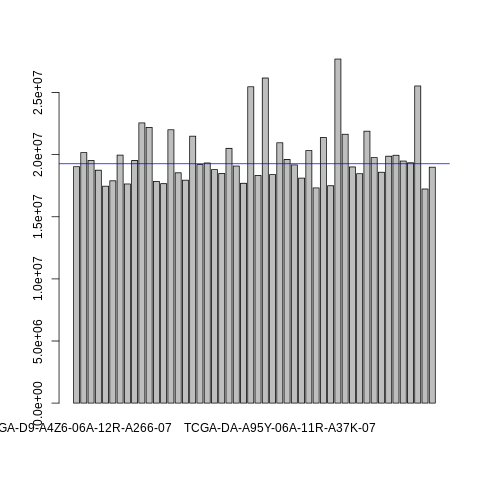

In [ ]:
%%R
#histogram with reads in the top 50 samples
barplot(colSums(data)[1:50])
abline(h=median(colSums(data)[1:50]),col="blue")


This allows us to immediately see that some samples have a total number of reads somewhat higher than the mean. Let’s now perform a more detailed
analysis of this data.

The R function `TCGAanalyze_Preprocessing` calculates the degree of correlation between samples (using the Pearson correlation coefficient) and graphically represents these correlations with a heat map. The box in row i column j represents the correlation coefficient of sample i and sample j.

Because this coefficient is symmetrical (corr(i, j) = corr(j, i)) the matrix is also symmetrical and the diagonal is equal to 1.

In addition to the correlation matrix, a box plot with the distributions of these correlations for each sample is also represented.

To display the correlation between the samples and between the boxplots you can run the following command: `TCGAanalyze_Preprocessing(normRSEMtranscr.counts, filename="sample_correlation.png", width = 2000, height = 2000)`.

This command may take some time, and so it has not been included in the execution.

A results image with the name “sample_correlation.png” is generated, as shown here (this example corresponds to the first 20 samples).








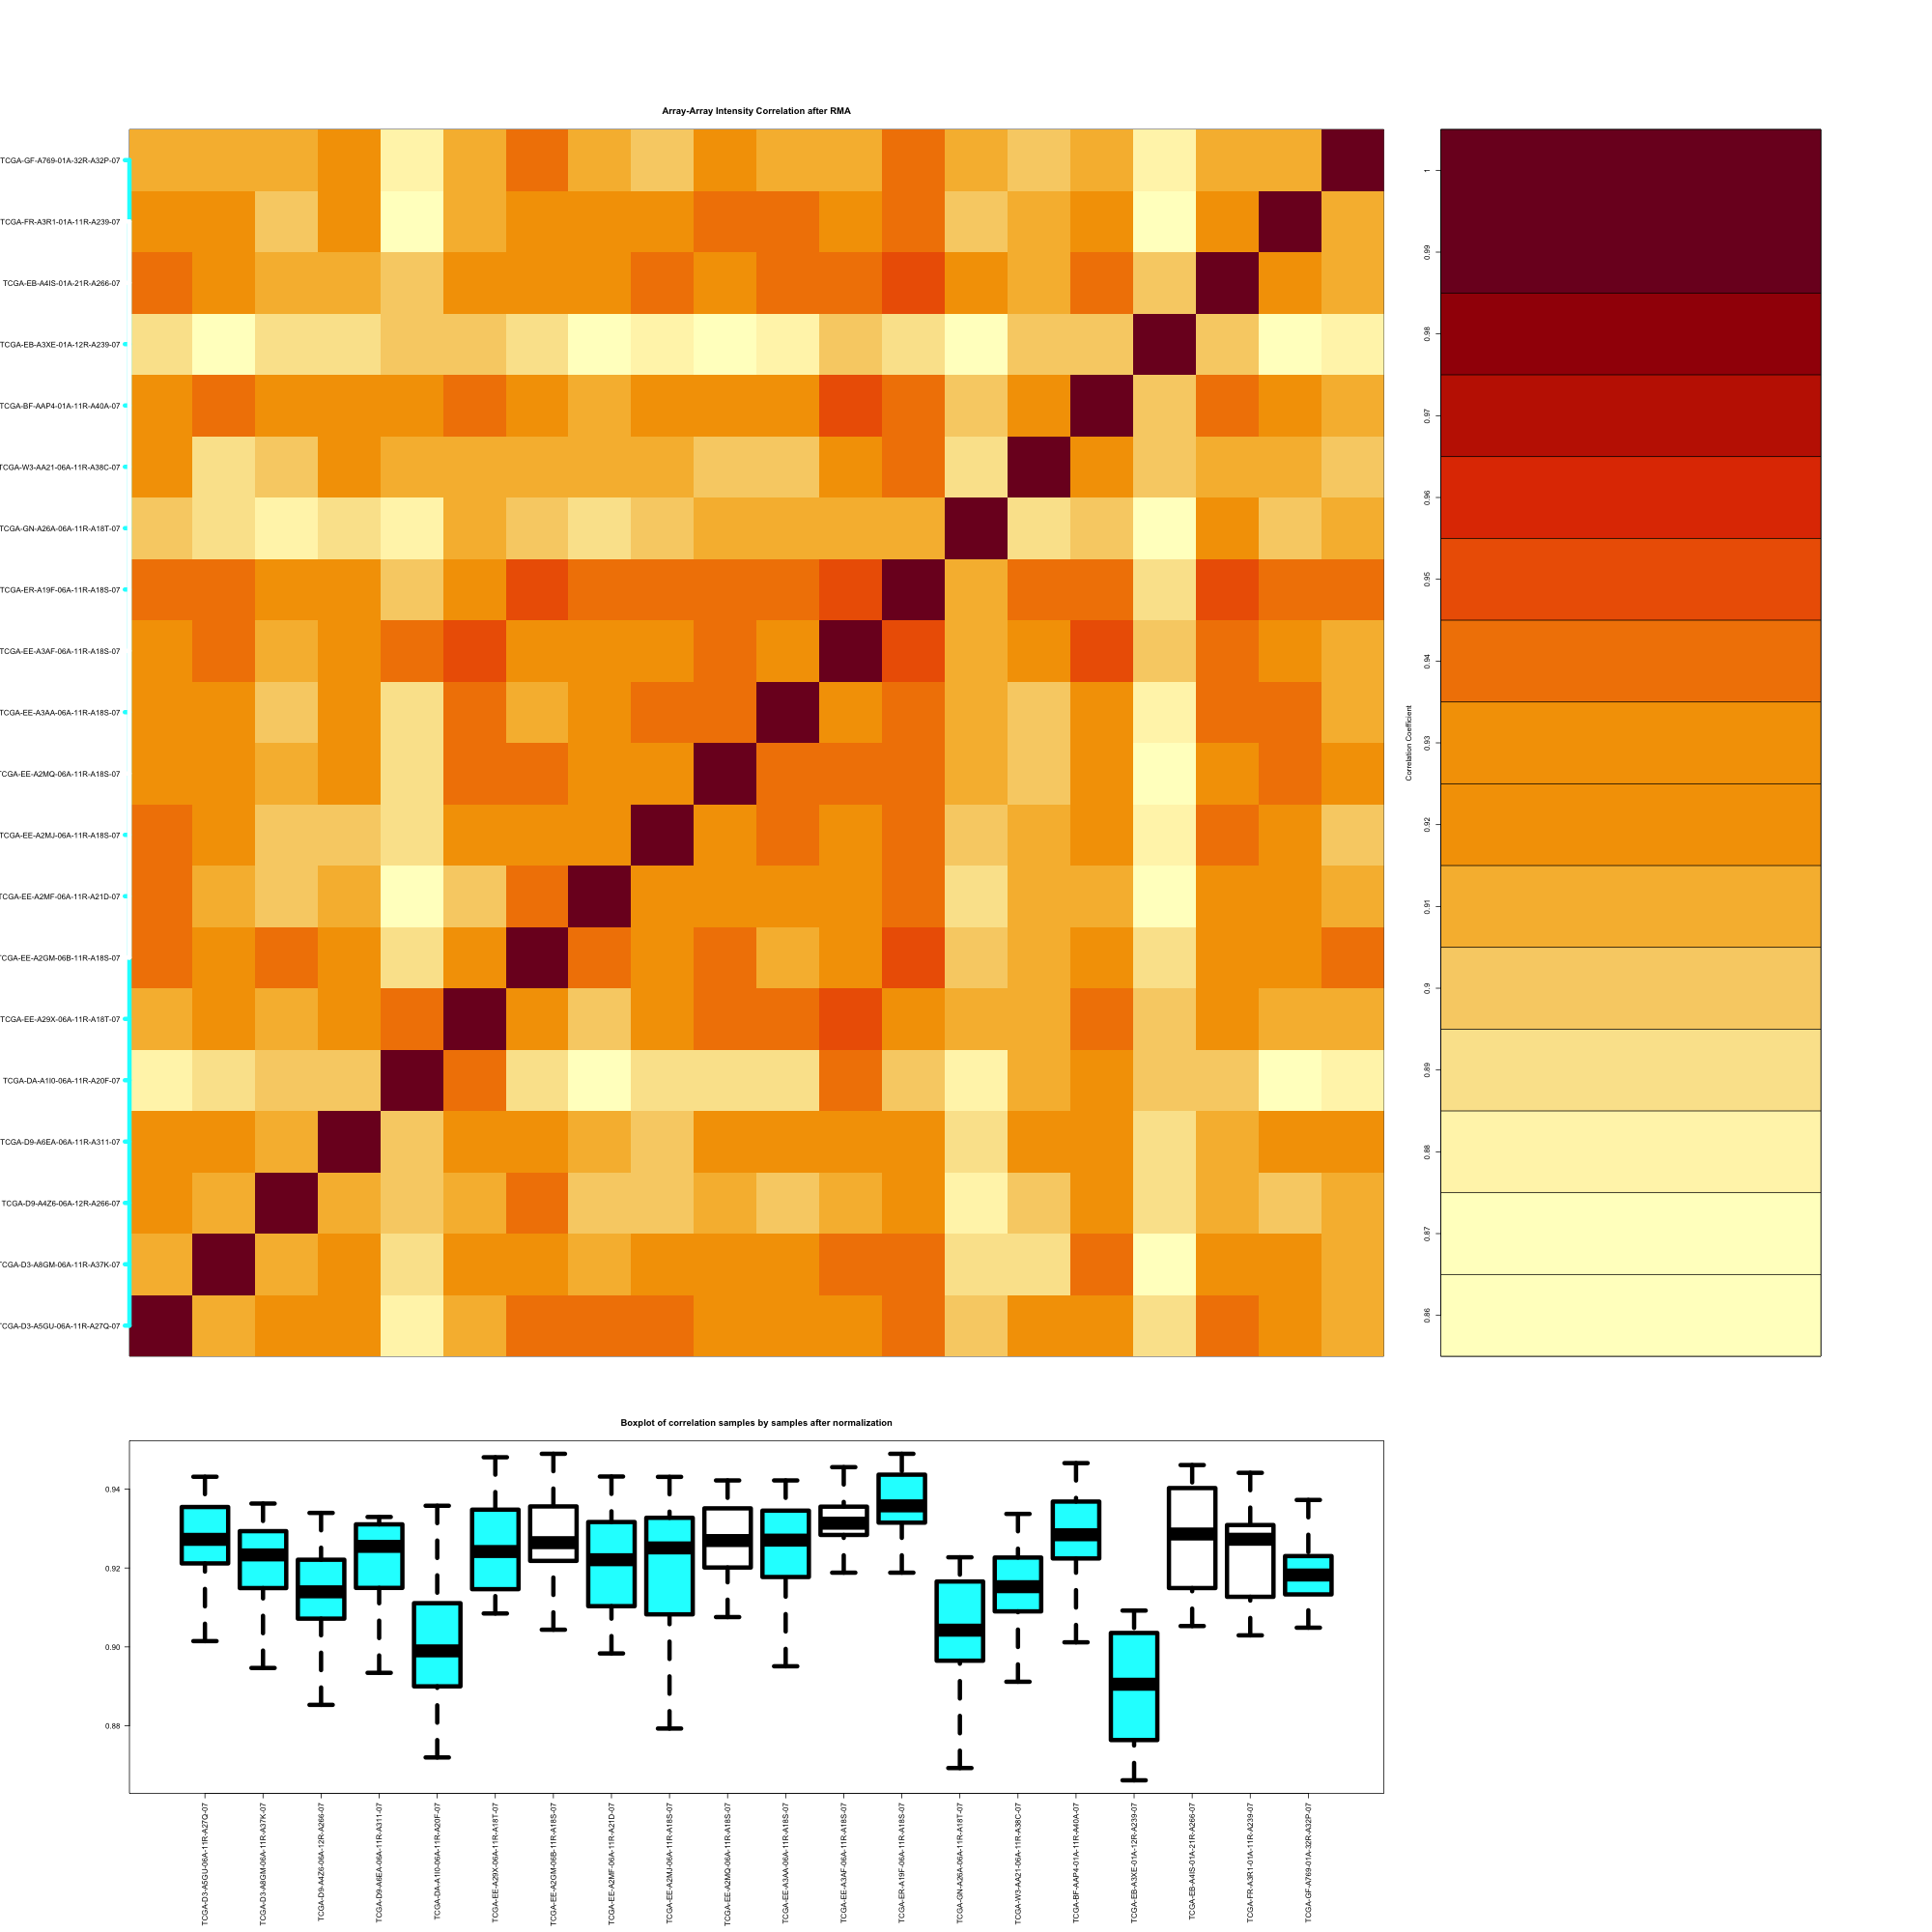

Analysis of the resulting image indicates that the correlation of three of the samples with the rest of the samples was significantly lower than average. That
is, the behavior of these three samples was different from the others. Visually, we can identify these samples in the heatmap and in the box plot as the samples at positions 5, 14, and 17, especially the latter one (from left to right on the X-axis). It is likely that studies later on will reveal the clustering of these samples (Module 6, Unsupervised learning: clustering and association rules) and will identify that one or several of them do, indeed, behave as outliers that are notably different from the rest.   

Box plots were also used to represent the distributions of expression values for each sample in order to identify biases and outliers and to validate the
effect of normalization on the data. Initially, the boxplot on the raw expression data showed the following:

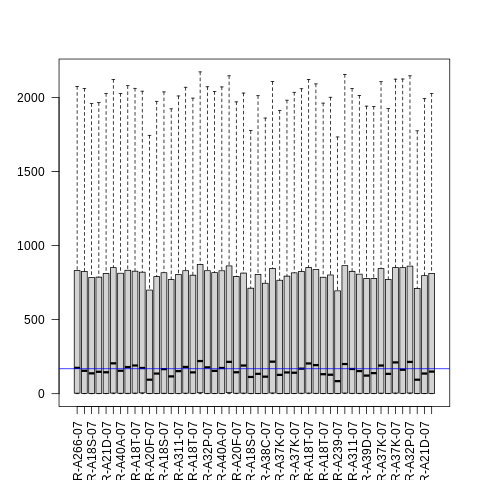

In [ ]:
%%R
# Boxplot con las distribuciones de valores de expresión de todos los genes en las 50 primeras muestras
boxplot(data[,1:50], outline=FALSE, las=2)
abline(h=median(data),col="blue")


These boxplots show us that the distribution of read counts per gene shows some variability between samples, although they were similar enough to be
considered in a pooled analysis.

It is possible for a sample to have a boxplot significantly offset from the rest (e.g., its median is much higher or lower than the horizontal blue line).

In this case, we would need to pay attention to this sample to check if the normalization applied had managed to correct this deviation with respect to the
behavior of the rest of the samples in the set.

The density distribution of the expression can also be painted for each sample, allowing comparison of the profiles between the samples.

También puede pintarse la distribución de densidad de la expresión para cada muestra, comparando perfiles entre las mismas

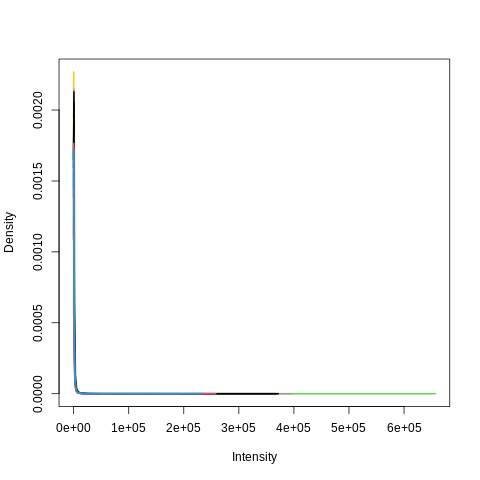

In [ ]:
%%R
# Perfil de densidad para las 10 primeras muestras
plotDensities(data[,1:10], legend=FALSE)

###1.2. Preprocessing and normalization

We now proceed with the second (`log2`) and third (`median`) steps mentioned above for the preprocessing and normalization of the data.

After each step, we should plot the expression value distributions to check the effect of these transformations.

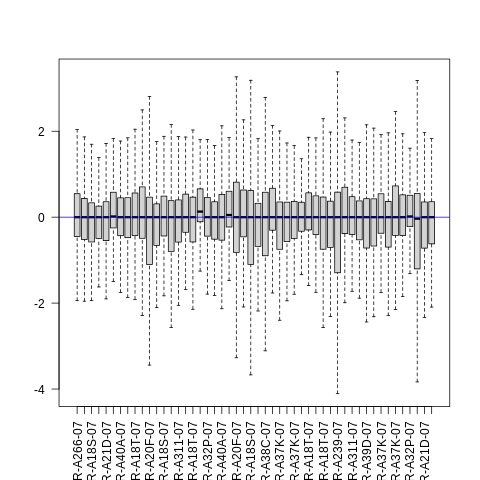

In [ ]:
%%R
# Preprocesing and normalization
# 1- log2 transformation
log2datamasuno<-log2(data+1)  #add 1 ato avoid log(0)

# 2- Median centering
medianbygene<-apply(log2datamasuno, 1, median)
normdata<-log2datamasuno-medianbygene

#Visualize data
boxplot(normdata[,1:50], outline=FALSE, las=2)
abline(h=median(normdata),col="blue")


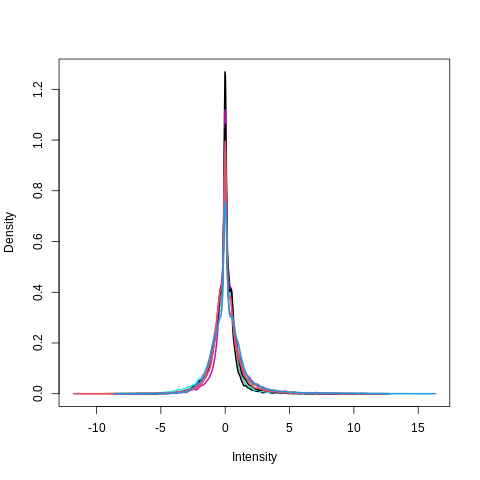

In [ ]:
%%R
# Densidad
plotDensities(normdata[,1:10], legend=FALSE)

These visualizations show that the distributions have indeed been centered at 0.

###1.3. Removing flat genes

A common step to simplify the analysis and improve the statistical power of the tests that we will later apply is to eliminate any genes that are hardly
expressed in any of the samples (genes with a low copy number in the samples, also termed ‘flat genes’). A common approach to this type of filtering is to
set a minimum gene copy number threshold, in counts per million reads (CPM).
The expression of any genes not reaching this threshold value can be considered almost null and so they can be discarded from the analysis.

Another widely employed method is retain only the genes with the greatest variance in expression values between samples. This filtering technique allows flat genes to be eliminated and allows the analysis to focus on the genes with the greatest potential to discriminate samples from each other.

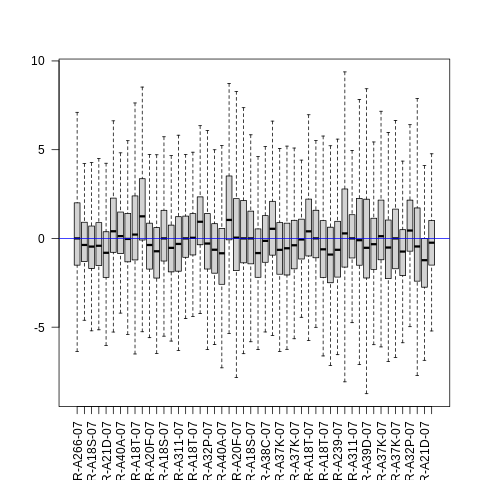

In [ ]:
%%R

# Select 1500 with highest variability
varianza<-apply(normdata, 1, var)
varianza<-sort(varianza, decreasing=TRUE) #decreasing a TRUE para coger los 1500 genes de más varianza
milquinientosgenes<-varianza[1:1500]
genes<-names(milquinientosgenes)
milquinientosgenesdata<-normdata[genes,]

# Visualize data
boxplot(milquinientosgenesdata[,1:50], outline=FALSE, las=2)
abline(h=median(milquinientosgenesdata),col="blue")


Additional transformations

Finally, we can transform the sample names in the expression matrix to match those in the clinical information table downloaded in Capsule 1. This is a
step that may lack the technical interest of other code cells but this ‘data carpentry’ is a very common practice used to prepare the data for computational
analysis.

In [ ]:
%%R

# ID tricks to match colnames(milquinientosgenesdata) with IDs in the mmc2 table from the Supl mat. from the paper
# remove last char from sample.info$sample so the ID matches the one in the clinical data table from the paper
sample.info$sample <- as.factor(substr(sample.info$sample, 1, nchar(as.vector(sample.info$sample))-1))
#given that
rownames(sample.info) == colnames(milquinientosgenesdata)
#replace colnames(milquinientosgenesdata) with sample.info$sample
colnames(milquinientosgenesdata)<-sample.info$sample



We then save the data matrix resulting from this process in a file named ´exprMatrix_prep_RSEM_log2_median_1500maxvar.tsv´ (the file name comes
from summarizing the main transformations applied on the data: an expression matrix preprocessed using the RSEM+log2+median method, in which the
1,500 genes with the maximum variance were selected.

In [ ]:
%%R
write.table(milquinientosgenesdata, file= "exprMatrix_prep_RSEM_log2_median_1500maxvar.tsv", sep="\t")

###1.4. An alternative preprocessing and normalization pipeline (Required for 2.3. "Differential Expression" and capsule 3)



A wide range of gene expression data normalization methods and transformations are available. For a more detailed analysis, we recommend you explore
the TCGAbiolinks manuals or the specialized literature (see references).

For illustrative purposes, an alternative normalization pipeline to the one proposed by the TCGA-SKCM researchers, as well as a representation of the
expression value distributions obtained, are presented here. In this pipeline the raw expression data is downloaded without any preliminary normalization,
a gcContent-type normalization is applied, and flat genes are filtered up to the first quartile (quantile) and are used in the [TMM normalization method](https://genomebiology.biomedcentral.com/articles/10.1186/gb-2010-11-3-r25).

The resulting boxplots show that this normalization method results in more
homogeneous distributions of the different samples compared to the previous pipeline.

**Note: the execution of this pipeline will take a few minutes because new expression data must be downloaded, preprocessed, and normalized
in this case. This step is mandatory to perform the analysis of 2.3. "Differential Expression" and capsule 3**

In [ ]:
%%R
library(TCGAbiolinks)
library(SummarizedExperiment)
library(DT)
library(NOISeq)

# Donwload raw data
subsetSamples=c("TCGA-EB-A5SF-01A-11R-A311-07","TCGA-EE-A3J8-06A-11R-A20F-07","TCGA-EB-A430-01A-11R-A24X-07","TCGA-BF-AAP1-01A-11R-A39D-07","TCGA-EE-A3J3-06A-11R-A20F-07","TCGA-EB-A550-01A-61R-A27Q-07","TCGA-FR-A3YO-06A-11R-A239-07","TCGA-YD-A9TA-06A-11R-A39D-07","TCGA-EB-A5FP-01A-11R-A27Q-07","TCGA-EB-A3XB-01A-11R-A239-07","TCGA-WE-A8ZO-06A-11R-A37K-07","TCGA-EB-A44Q-06A-11R-A266-07","TCGA-EB-A431-01A-11R-A266-07","TCGA-DA-A960-01A-11R-A37K-07","TCGA-BF-A3DJ-01A-11R-A20F-07","TCGA-D3-A8GP-06A-11R-A37K-07","TCGA-D9-A3Z1-06A-11R-A239-07","TCGA-YG-AA3N-01A-11R-A38C-07","TCGA-EB-A44P-01A-11R-A266-07","TCGA-D3-A51N-06A-11R-A266-07","TCGA-FW-A5DY-06A-11R-A311-07","TCGA-WE-A8ZM-06A-11R-A37K-07","TCGA-YD-A89C-06A-11R-A37K-07","TCGA-EB-A5UM-01A-11R-A311-07","TCGA-D3-A8GB-06A-11R-A37K-07","TCGA-EE-A3JH-06A-11R-A21D-07","TCGA-W3-AA1Q-06A-11R-A38C-07","TCGA-D3-A51F-06A-11R-A266-07","TCGA-D3-A3ML-06A-11R-A21D-07","TCGA-FW-A3R5-06A-11R-A239-07","TCGA-RP-A695-06A-11R-A311-07","TCGA-FR-A7UA-06A-32R-A352-07","TCGA-D3-A5GU-06A-11R-A27Q-07",",CGA-GF-A6C8-06A-12R-A311-07","TCGA-BF-A5ER-01A-12R-A27Q-07","TCGA-EB-A6QZ-01A-12R-A32P-07","TCGA-WE-A8ZQ-06A-41R-A37K-07","TCGA-BF-A5EP-01A-12R-A27Q-07","TCGA-OD-A75X-06A-12R-A32P-07","TCGA-EB-A5SE-01A-11R-A311-07","TCGA-EB-A553-01A-12R-A27Q-07","TCGA-D3-A51J-06A-11R-A266-07","TCGA-RP-A694-06A-11R-A311-07","TCGA-EB-A42Y-01A-12R-A24X-07","TCGA-D3-A51K-06A-11R-A266-07","TCGA-EB-A3HV-01A-11R-A21D-07","TCGA-D3-A8GV-06A-11R-A37K-07","TCGA-FS-A4F2-06A-11R-A24X-07","TCGA-EB-A44O-01A-11R-A266-07","TCGA-D9-A4Z2-01A-11R-A24X-07","TCGA-FR-A3R1-01A-11R-A239-07","TCGA-D9-A6E9-06A-12R-A311-07","TCGA-YD-A9TB-06A-12R-A40A-07","TCGA-FS-A1ZA-06A-11R-A18T-07","TCGA-ER-A19A-06A-21R-A18U-07","TCGA-FS-A1ZB-06A-12R-A18S-07","TCGA-EE-A2GD-06A-11R-A18T-07","TCGA-D3-A2J9-06A-11R-A18T-07","TCGA-EE-A2M7-06A-11R-A18U-07","TCGA-FS-A1Z7-06A-11R-A18T-07","TCGA-EE-A2GI-06A-11R-A18T-07","TCGA-ER-A193-06A-12R-A18S-07","TCGA-EE-A17X-06A-11R-A18S-07","TCGA-EE-A2MI-06A-11R-A18U-07","TCGA-DA-A1HV-06A-21R-A18S-07","TCGA-FS-A1Z0-06A-11R-A18T-07","TCGA-EE-A2GR-06A-11R-A18S-07","TCGA-FS-A1ZY-06A-11R-A18S-07","TCGA-D3-A2JG-06A-11R-A18T-07","TCGA-D3-A1Q1-06A-21R-A18T-07","TCGA-EE-A2MC-06A-12R-A18S-07")
query.raw <- GDCquery(project = "TCGA-SKCM", data.category = "Transcriptome Profiling", data.type = "Gene Expression Quantification", workflow.type = "STAR - Counts", barcode=subsetSamples)

GDCdownload(query.raw)

SKCM.counts <- GDCprepare(query = query.raw,
                          summarizedExperiment = TRUE)
rm(query.raw)

# Expression matrix
data2<-assay(SKCM.counts)

# Pre-processing
#dataPrep<-TCGAanalyze_Preprocessing(object=SKCM.counts,
#                                    cor.cut = 0.6)
# Normalization
dataNorm<-TCGAanalyze_Normalization(tabDF=data2,
                                    geneInfo = TCGAbiolinks::geneInfoHT,
                                    method="gcContent")
# Filtering
dataFilt<-TCGAanalyze_Filtering(tabDF=dataNorm,
                                method="quantile",
                                qnt.cut = 0.25)
# 4- TMM Method
dataTMMnorm<- tmm(dataFilt)





Attaching package: ‘Matrix’



    expand





























|====================================================|100%                      Completed after 21 s 







  => unstranded
  => stranded_first
  => stranded_second
  => tpm_unstrand
  => fpkm_unstrand
  => fpkm_uq_unstrand








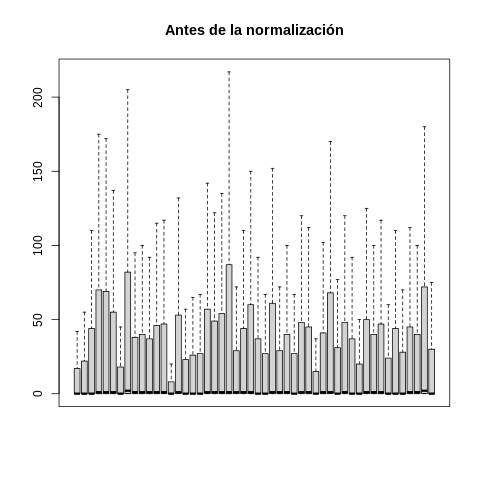

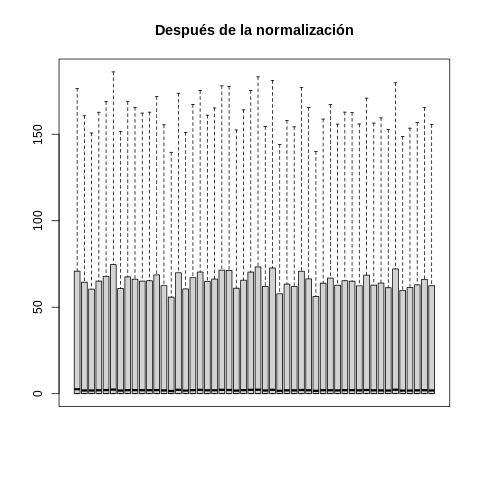

In [ ]:
%%R
# Boxplots

boxplot(data2[,1:50], outline=FALSE, main="Antes de la normalización", xaxt="n")
boxplot(dataTMMnorm[,1:50], outline=FALSE, main="Después de la normalización", xaxt="n")



## **2. DATA ANALYSIS AND GRAPHICAL REPRESENTATIONS** <a id='exploratory'></a>


Once filtered and standardized, depending on the type of information to be obtained and the experimental design, different types of techniques are
applied.

In this context, there are numerous statistical and computational techniques that are applied depending on the problem to be addressed and the questions posed. From the point of view of machine learning we can talk about:

**Unsupervised learning techniques**. No previous classifications or predefined classes are used. Among them we have multivariate analysis methods,
clustering, dimensionality reduction, extraction of association rules, etc.

**Supervised learning techniques**. In this case, known or predefined classes are used for the data. The construction of classifiers or the detection of biomarkers by selecting variables that show significant differences in mean expression values between different types of samples are two of the most frequent methodologies in this field.

These techniques will be discussed in detail in later modules. However, this section briefly introduces some R functions for data analysis and visualization.

###2.1. Clustering and Heatmaps

Clustering methods are one of the most widely used techniques for gene expression analysis. These methods can be applied to discover groups of genes
or samples that show similarities in their expression profiles and have had very useful applications in establishing, for example, new disease classifications based on molecular patterns.

Hierarchical clustering and consensus clustering algorithms are some of the most widely used in this context. These methods generate a dendrogram that
serves to explore groups of elements that show greater similarity as well as a basis for further division into subgroups. Heatmaps are also a very useful
visualization technique used in combination with clustering to allow to visually represent the expression matrix ordered by the similarities between elements. These representations involve a rearrangement of rows and columns, so that similar objects (genes in the rows and samples in the columns) are placed in adjacent positions. In this way, they allow you to see at a glance the expression profiles of genes (rows) and samples (columns) and to identify clusters in the data, as we will see in detail in Module 6, Capsule 2.

R has very powerful functions for representing heatmaps and enriching them with annotations that are added as colored legends for samples or genes.
These visualizations allow us to confront the structure derived from the data analysis (the clusters) with the information known for the samples. The following figure illustrates this type of functionality. In this figure, a heatmap for the TCGA-SKCM expression matrix with dendrograms for rows (genes) and columns (samples) is depicted, together with colour annotations for the types of tumours (samples). Again, Clustering and these representations will be discussed in depth in Module 6, Capsule 2.

png 
  2 


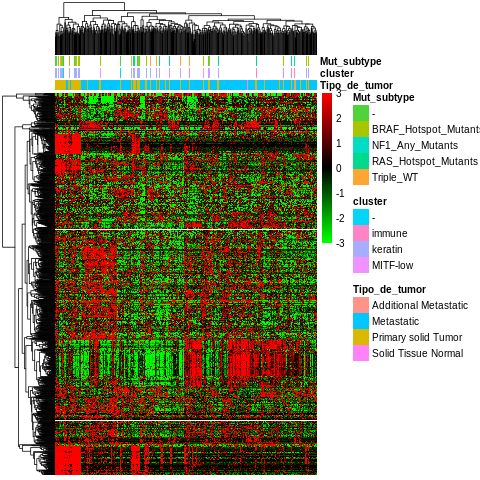

In [ ]:
%%R

definitiondata<-data.frame( row.names=rownames(sample.info),Tipo_de_tumor=sample.info@listData[["definition"]])
subtypedata<-data.frame(row.names=rownames(sample.info), cluster=sample.info@listData[["subtype_RNASEQ.CLUSTER_CONSENHIER"]])
subtypemutationdata<-data.frame(row.names=rownames(sample.info), Mut_subtype=sample.info@listData[["subtype_MUTATIONSUBTYPES"]])
anotacionesfila<-data.frame(cbind(definitiondata, subtypedata, subtypemutationdata))

my_colors=c("green", "black", "red")
my_colors=colorRampPalette(my_colors)(100)
pheatmap(milquinientosgenesdata, color= my_colors, show_rownames = F, show_colnames = F, breaks = seq(-3,3,length.out = 100), annotation_col = anotacionesfila)
TCGAvisualize_Heatmap(milquinientosgenesdata)


###2.2. Dimensionality reduction

It should be remembered that in this type of study there are usually tens of thousands of variables quantified in a few tens of samples. Therefore, it is also common to use dimensionality reduction techniques such as principal component analysis (PCA) whereby the original observations are replaced by *n*
linear combinations, with *n* being much smaller than the original dimensions. The *n* principal components are selected to represent a reasonable
proportion of the total variation.

The R function prcomp computes the principal components of a matrix given as an argument. The following code illustrates how to identify on the
submatrix *milquinquinientosgenesdata[1:50,1:20]* the genetic profiles of maximum variance. First, we consider each gene to be an
observation and the samples to be the variables.

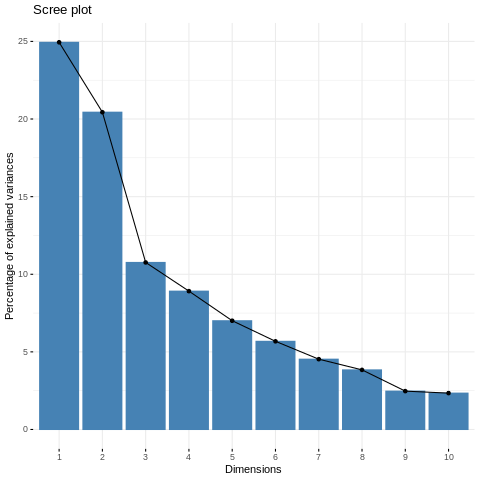

In [ ]:
%%R
# 1- PCA
library(factoextra)
pca <- prcomp(milquinientosgenesdata[1:50,1:20])
fviz_eig(pca)



This plot represents the amount of variability explained by each of the calculated principal components. In this case, 45% of the variance in the data was explained by the first two principal components. The following graph shows how the genes are represented in a space defined by these two principal
components.

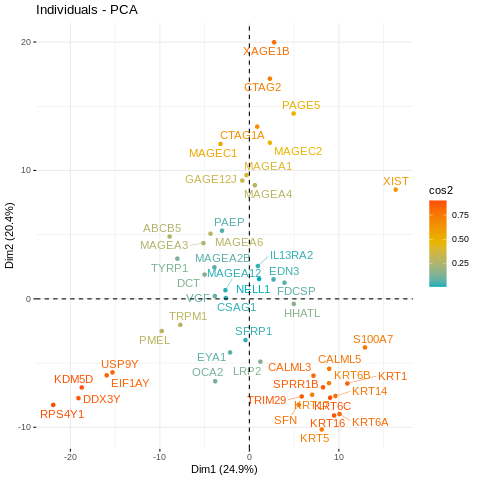

In [ ]:
%%R
library(scales)
fviz_pca_ind(pca,
             col.ind = "cos2", # Color by the quality of representation
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
)

We now proceed in the same way, but consider each sample an observation and each gene a variable. To do this, we must transpose the matrix shown
above by using the t function, leaving the rest of the code unchanged.

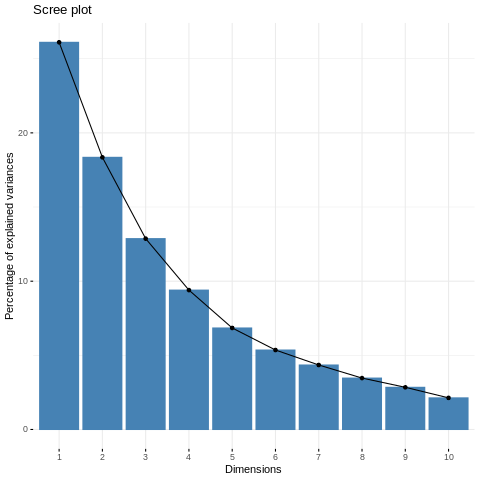

In [ ]:
%%R
# 2- PCA aplicado sobre las muestras (transponiendo la matriz original con la funcion t)
pca <- prcomp(t(milquinientosgenesdata[1:50,1:20]))
fviz_eig(pca)


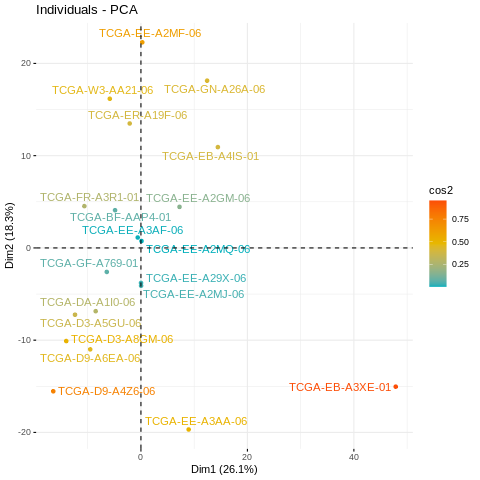

In [ ]:
%%R
fviz_pca_ind(pca,
             col.ind = "cos2", # Color by the quality of representation
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
)

These graphical representations allow us to take a preliminary approach to the data and their distribution in space to identify any correlated samples
(genes) and clusters of samples (genes) within the data.

###2.3. Differential expression

One of the main objectives of many transcriptomics studies is to find genes that show a differential expression pattern between different types of samples.
For example, the identification of genes that show differential expression in patients compared to healthy controls.

These studies evaluate whether there is a significant difference in the mean expression of each gene in two, or more, conditions analyzed. Given a set of
samples belonging to two experimental groups, A and B, (e.g. healthy controls and tumor samples), a hypothesis test is performed for each gene:

${H_0}: \mu_A=\mu_B$

${H_1}: \mu_A \neq\mu_B$

By applying the corresponding test, each gene is assigned a p-value which is used to select those that show a significant difference in expression between
the two conditions.

There is a large literature on differential expression analysis. To introduce you to the topic, you can consult the reference Costa-Silva et al., 2017 in the
bibliography.

The following code illustrates how to apply a differential expression analysis (DEA) between metastasis-type and primary solid tumor-type samples by
using the TCGAanalyze_DEA function on the data previously downloaded from the TCGA-SKCM project.

In [ ]:
%%R

#Información de muestras
sample.info<-colData(SKCM.counts)
# Separar los datos en melanoma y tumor sólido primario.
TMdata<-dataTMMnorm[,which(sample.info@listData[["definition"]]=="Metastatic")]
PSTdata<-dataTMMnorm[,which(sample.info@listData[["definition"]]=="Primary solid Tumor")]

# Análisis de expresión diferencial entre metástasis y tumores sólidos primarios.
dataDEGs <- TCGAanalyze_DEA(mat1 = TMdata,
                        	mat2 = PSTdata,
                        	Cond1type = "Metastatic",
                        	Cond2type = "Primary solid Tumor",
                        	fdr.cut = 0.01 ,
                        	logFC.cut = 1,
                        	method = "glmLRT")

genesexpresadosdif <- as.character(rownames(dataDEGs))
genesexpresadosdif[1:10]


 [1] "ENSG00000000938" "ENSG00000001626" "ENSG00000002726" "ENSG00000005001"
 [5] "ENSG00000005187" "ENSG00000005381" "ENSG00000006377" "ENSG00000006432"
 [9] "ENSG00000006555" "ENSG00000006740"


The result of these analyses is a list of differentially expressed genes that are candidates for further in-depth study as potential biomarkers. This is a very common task in bioinformatics. The following capsule shows how to approach this type of functional analysis to try to interpret the information about
pathways or biological processes associated with these lists of genes.

## References
1. The Cancer Genome Atlas (TCGA) https://www.cancer.gov/about-nci/organization/ccg/research/structural-genomics/tcga
2. TCGA Biolinks https://bioconductor.org/packages/release/bioc/html/TCGAbiolinks.html
3. Manual de uso TCGA-Biolinks https://www.bioconductor.org/packages/devel/bioc/vignettes/TCGAbiolinks/inst/doc/analysis.html
4. Cancer Genome Atlas Network. Genomic Classification of Cutaneous Melanoma. Cell. 2015;161(7):1681‐1696. doi:10.1016/j.cell.2015.05.044
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4580370/
5. Abrams, Z.B., Johnson, T.S., Huang, K. et al. A protocol to evaluate RNA sequencing normalization methods. BMC Bioinformatics 20, 679 (2019). https://doi.org/10.1186/s12859-019-3247-x
6. Costa-Silva, J., Domingues, D., and Lopes, F.M. (2017). RNA-Seq differential expression analysis: An extended review and a software tool. PLOS ONE 12, e0190152.


# **Capsule 3. Enrichment analysis of functional annotations.**


**Authors:**:

*By* **Carlos Cano Gutiérrez**

Assistant Professor at the University of Granada, Department of Computer Science and Artificial Intelligence.

*By* **Pedro Carmona Sáez**  

Assistant Professor at the University of Granada, Department of Statistics and Operations Research.



## INDEX
In this *NoteBook*:
1. We will discover what enrichment analysis in experiments with omics data is.
2. We will learn how to use the main functional analysis methods.
3. We describe how to represent the results of this type of analysis.
4. We will explore how to handle some of the main sources of information on biological functions and metabolic pathways.

Contents:
1. [Annotation enrichment analysis](#enrichment)
2. [Gene set enrichment analysis](#exploratory)
3. [Graphical representations of functional analyses](#visualizaion)

## **1. WHAT IS ENRICHMENT ANALYSIS?** <a id='funcional'></a>

In most cases, the result of omics data analysis comprises large lists of genes or proteins associated with a certain phenotype, e.g., genes differentially
expressed between two conditions (patients vs. healthy individuals) or genes with common methylation patterns, etc. From this point onward, the aim of
the study should focus on extracting biological knowledge for these genes. This knowledge will help to understand which biological
processes and functions are de-regulated and will serve as a starting point for understanding the molecular basis of the phenotypes being studied.

To this end, one of the classic approaches is to evaluate whether any information (in the form of annotations) is over-represented in the gene list
compared to the rest of the genes in the genome. This type of analysis, called **functional analysis or enrichment analysis**, is based on annotating genes
with information available in different databases such as [Gene Ontology](http://geneontology.org/) or the [Kyoto Encyclopedia of Genes and Genomes](https://www.genome.jp/kegg/), and establishing the frequencies of each
term in the gene list and the rest of the genome. This allows a statistical test to be applied to determine which functional annotations are significantly
enriched in the list.

In this NoteBook we will learn how to use some of the major annotation databases, apply some of the most widespread functional analysis methods, and
explore and visualize the results.


## **2. ENRICHMENT ANALYSIS OF INDIVIDUAL ANNOTATIONS** <a id='single'></a>



Enrichment analysis is based on whether there is an overrepresentation of a given annotation in the list of genes of interest with respect to the rest of the genome. One of the most frequently used statistical tests in this context is based on the hypergeometric distribution. The probability of finding a certain number of genes associated with each annotation can be calculated as follows:

$P(X=i)={\frac{\binom{M}{i}\binom{N-M}{N-i}}{\binom{N}{n}}}$

where $N$ is the total number of genes in the genome, $M$ is the number presenting a given annotation, $n$ is the number of genes in the list, and $i$ is the number of genes in the list with the annotation.

The p-value is calculated, but we must remember that when many genes are analyzed, the p-value must be corrected to consider the problem of multiple
comparisons. The application of the Bonferroni correction or calculation of the false discovery rate (FDR) are two of the most frequent methods applied to
achieve this.

###2.1. Example 1. Gene Ontology term enrichment

The GO project is a widely used resource that has established a gene ontology that categorizes current scientific knowledge about the functions of the
genes of many different organisms—from humans to bacteria—in annotations. It is one of the leading sources of information for functional analysis and
has been cited in tens of thousands of publications.

The project began in 1998 when researchers studying the genomes of three classic model organisms: Drosophila melanogaster (fruit flies), Mus musculus
(mice), and Saccharomyces cerevisiae (a yeast) agreed to work collaboratively on a common gene function classification scheme. GO offers two main
resources:

* The ontology itself; in other words, the vocabulary of terms and the relationship between them for distinct types of biological functions (Molecular
Function), the pathways that carry out different biological programs (Biological Process), and places where these occur (Cellular Component);

* The corpus of the GO annotations for the different genes of many organisms.


In [ ]:
%%R
library(clusterProfiler)
library(org.Hs.eg.db)

# Create a list of IDs of genes of interest (these might be the result of some previous analysis and could be loaded from a file, for example)
gene<-c("4312","8318","10874","55143","55388","991","6280","2305","9493","1062","3868","4605","9833","9133","6279","10403","8685","597","7153","23397","6278","79733","259266","1381","3627","27074","6241","55165","9787","7368","11065","55355","9582","220134","55872","51203","3669","83461","22974","10460","10563","4751","6373","8140","79019","820","10635","1844","4283","27299","55839","27338","890","9415","983","54821","10232","4085","6362","9837","5080","7850","81930","5918","81620","332","55765","79605","3832","6286","5163","2146","3002","50852","7272","2568","64151","51806","366","2842")

#We will use as reference data from DOSE package
data(geneList, package="DOSE")

# Functional enrichment analysis for the previous gene list with Gene Ontology terms for Cellular Component (CC)
GO <- enrichGO(gene = gene, universe = names(geneList), OrgDb = org.Hs.eg.db,	ont= "CC", pAdjustMethod = "BH", pvalueCutoff = 0.01, qvalueCutoff = 0.05, readable = TRUE)

head(GO)






If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141

Attaching package: ‘clusterProfiler’



    slice



    rename



    filter



Attaching package: ‘AnnotationDbi’



    select





                   ID                              Description GeneRatio
GO:0000775 GO:0000775           chromosome, centromeric region     18/80
GO:0098687 GO:0098687                       chromosomal region     20/80
GO:0000779 GO:0000779 condensed chromosome, centromeric region     15/80
GO:0000793 GO:0000793                     condensed chromosome     17/80
GO:0000776 GO:0000776                              kinetochore     14/80
GO:0005819 GO:0005819                                  spindle     18/80
             BgRatio       pvalue     p.adjust       qvalue
GO:0000775 196/11894 5.317052e-16 8.028749e-14 6.380462e-14
GO:0098687 315/11894 1.327696e-14 1.002411e-12 7.966177e-13
GO:0000779 145/11894 3.157446e-14 1.589248e-12 1.262978e-12
GO:0000793 217/11894 5.398323e-14 2.037867e-12 1.619497e-12
GO:0000776 136/11894 2.628082e-13 7.936808e-12 6.307397e-12
GO:0005819 338/11894 6.672206e-12 1.679172e-10 1.334441e-10
                                                                     

###2.2. Example 2. Enrichment of Kyoto Encyclopedia of Genes and Genomes pathways (KEGG)

KEGG is a project that was initiated in 1995 by the Japanese human genome program and has become a widely used resource for the analysis of
enzymatic pathways and organism-specific molecular interaction networks. KEGG not only provides a graphical representation of these networks and how
genes and proteins are interconnected, but also offers annotations for each gene and for the pathways each gene is involved in.

In [ ]:
%%R
# Functional enrichment using KEGG for the same gene list "gene" used in the previous cell
enrichKEGG <- enrichKEGG( gene = gene,
                          organism = 'hsa',
                          pvalueCutoff = 0.05)
head(enrichKEGG )




                                     category
hsa04110                   Cellular Processes
hsa04657                   Organismal Systems
hsa04218                   Cellular Processes
hsa04061 Environmental Information Processing
hsa04114                   Cellular Processes
hsa04914                   Organismal Systems
                                 subcategory       ID
hsa04110               Cell growth and death hsa04110
hsa04657                       Immune system hsa04657
hsa04218               Cell growth and death hsa04218
hsa04061 Signaling molecules and interaction hsa04061
hsa04114               Cell growth and death hsa04114
hsa04914                    Endocrine system hsa04914
                                                           Description
hsa04110                                                    Cell cycle
hsa04657                                       IL-17 signaling pathway
hsa04218                                           Cellular senescence
hsa04061 Viral p

The pathways can be visualized alongside the genes associated with them, by using the “browseKEGG(enrichKEGG, 'hsa04110')” command.

See e.g., www.kegg.jp/kegg-bin/show_pathway?hsa04110/8318/991/9133/890/983/4085/7272

## **3. CO-ANNOTATION ENRICHMENT ANALYSIS (MODULAR ENRICHMENT)**<a id='modular'></a>


Another type of analysis considers the relationship between different terms and the fact that the same gene may be annotated with data from various
sources. Of note, finding relationships between annotations based on co-occurrence patterns can broaden our understanding of the biological events
associated with a given experimental system. For example, a set of differentially expressed genes may be associated with the activation of biological processes restricted to certain cellular organelles. Therefore, the retrieval of such associations provides meaningful additional information for the interpretation of experimental results.

In this example we will use the [GENECODIS](https://genecodis.genyo.es/), to integrate different sources of information and extract sets of annotations that coincide in a minimum number of genes. You can run an example by copying a list of genes and performing an analysis in the application.

## **4. GENE SET ENRICHMENT ANALYSIS (GSEA)**<a id='gsea'></a>



Gene Set Enrichment Analysis (Subramanian et al., 2005) is an algorithm developed to alleviate some limitations of enrichment analyses that are applied
after selecting a list of differentially expressed genes such as: (i) in some occasions differential expression analyses there are no genes that pass the
thresholds of statistical significance (ii) there may be genes that although they do not pass the thresholds remain with very close values and can provide
very useful information for functional interpretation.

GSEA is based on sorting the entire list of genes based on differential expression between two conditions without applying a threshold to select a list and evaluating the distribution of genes associated with a given annotation across the entire list and calculating an Enrichment Score. Details on the
methodology can be found in the original publication, but in a summarized form:

Given an *NxM* matrix we order the *N* genes based on a measure of association with the phenotype $r(gj) = rj$ obtaining the ordered list *L: {g1, . . . . ,
gN}* and a *p value*.

Given an independent set of $N_H$ genes *S*, for example genes that are annotated with the same function, we evaluate the fraction of genes in *S* (*T*)
weighted by their correlation and the fraction of genes that are not in *S* (*F*) that are up to a given position *i* in *L*.

$P_T (S,i)=\displaystyle\sum_{g_j\in S; j\leqslant i} ={\frac{ |{r_j}|^p }{N_R}}$,

where $N_R=\displaystyle\sum_{g_j\in S}|{r_j}|^p$

$P_F (S,i)=\displaystyle\sum_{g_j\notin S; j\leqslant i} ={\frac{ 1 }{(N-N_H)}}$

The *enrichment score* ES is the maximum deviation from zero of $P_T−P_F$. If *S* is randomly distributed ES(S) will have a small value, but if it is concentrated at the top or bottom of the list ES(S) will have a high value.

Significance is calculated by computing the ES obtained by permuting the original classes, repeating this process a large number of times and comparing
the observed ES with those obtained in the permutations and finally correcting the *p-values* obtained by multiple comparisons.


###4.1. Example 3. Gene Set Enrichment Analysis of KEGG pathways

In [ ]:
%%R
kegg <- gseKEGG(geneList = geneList, organism = 'hsa',
 	nPerm 	= 1000,
 	minGSSize	= 120,
 	pvalueCutoff = 0.05,
 	verbose 	= FALSE)
head(kegg)



               ID                             Description setSize
hsa04110 hsa04110                              Cell cycle     139
hsa05169 hsa05169            Epstein-Barr virus infection     193
hsa04613 hsa04613 Neutrophil extracellular trap formation     130
hsa04218 hsa04218                     Cellular senescence     141
hsa05166 hsa05166 Human T-cell leukemia virus 1 infection     202
hsa04510 hsa04510                          Focal adhesion     191
         enrichmentScore       NES      pvalue   p.adjust     qvalue rank
hsa04110       0.6637551  2.835535 0.003039514 0.02101167 0.01447198 1155
hsa05169       0.4335010  1.939236 0.003448276 0.02101167 0.01447198 2820
hsa04613       0.4496569  1.895248 0.003086420 0.02101167 0.01447198 2575
hsa04218       0.4115945  1.762384 0.003115265 0.02101167 0.01447198 1155
hsa05166       0.3893613  1.759251 0.003367003 0.02101167 0.01447198 1955
hsa04510      -0.4199193 -1.708300 0.001404494 0.02101167 0.01447198 2183
                    

## **5. VISUALIZATIONS**<a id='visualizaciones'></a>


Several options are available for visualizing enrichment results, some of which are described below.

###5.1. Bar plot

This is the most frequent type of visualization which represents the enriched terms and the frequency or p-values of each one.



If you use DOSE in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Guang-Rong Yan, Qing-Yu He. DOSE: an R/Bioconductor package for Disease Ontology Semantic and Enrichment analysis. Bioinformatics 2015, 31(4):608-609




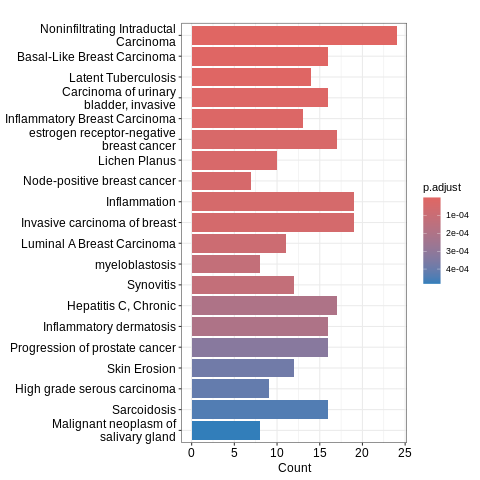

In [ ]:
%%R
# We will use DOSE package
library (DOSE)
data(geneList)
deGenes <- names(geneList)[abs(geneList) > 2]

edo <- enrichDGN(deGenes)
library(enrichplot)
barplot(edo, showCategory=20)


###5.2. Network of genes and functional terms

Bar plots only show the enriched terms but information about the functional annotations and genes associated with them can also be useful.


Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


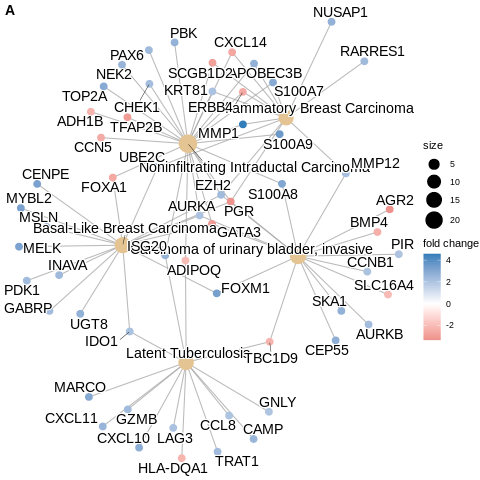

In [ ]:
%%R

## Convert gene ID in gene Symbol
edox <- setReadable(edo, 'org.Hs.eg.db', 'ENTREZID')
p1 <- cnetplot(edox, foldChange=geneList)

cowplot::plot_grid(p1, ncol=1, labels=LETTERS[1], rel_widths=c(1.2))


###5.3. Heat maps

These representations are extremely useful for denoting experimental data (e.g., gene expression data) and can also be used to represent terms and
genes. Like networks, they provide information about the relationship between genes and terms; when there are many terms and genes, the networks can
become extraordinarily complex and the visualizations become inadequate, and so a heatmap representation may become more appropriate



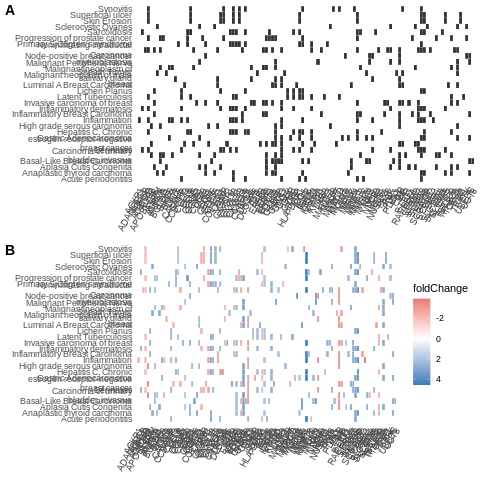

In [ ]:
%%R
p1 <- heatplot(edox)
p2 <- heatplot(edox, foldChange=geneList)
cowplot::plot_grid(p1, p2, ncol=1, labels=LETTERS[1:2])

## **REFERENCES**<a id='refs'></a>

* The Gene Ontology Consortium (2019). The Gene Ontology Resource: 20 years and still GOing strong. Nucleic Acids Research, Volume 47
* Huang, D.W., Sherman, B.T., and Lempicki, R.A. (2009). Bioinformatics enrichment tools: paths toward the comprehensive functional analysis of large gene lists. Nucleic Acids Res. 37, 1–13.
* Subramanian, A., Tamayo, P., Mootha, V.K., Mukherjee, S., Ebert, B.L., Gillette, M.A., Paulovich, A., Pomeroy, S.L., Golub, T.R., Lander, E.S., et al. (2005). Gene set enrichment analysis: a knowledge-based approach for interpreting genome-wide expression profiles. Proc. Natl. Acad. Sci. U. S. A. 102, 15545–15550.

<div class="alert alert-block alert-success">

MOOC Machine Learning y Big Data para la Bioinformática (2ª edición)   
http://abierta.ugr.es     
    
</div>    
